In [649]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [650]:
Customer_support_data = pd.read_csv(r'E:\python projects\Datasets\careem\customer_support.csv')

Customer_support_data.head()

,ticket_id,trip_id,user_id,driver_id,issue_category,status,resolution_time_minutes
0,1,33554,8851,7501,dispute,escalated,477.0
1,2,9428,3337,8514,dispute,escalated,430.0
2,3,200,18400,1169,dispute,open,1015.0
3,4,12448,7915,9629,dispute,escalated,1366.0
4,5,39490,9417,3099,lost item,escalated,954.0


In [651]:
Customer_support_data['time in hours'] = Customer_support_data['resolution_time_minutes']/60
Customer_support_data.head()

,ticket_id,trip_id,user_id,driver_id,issue_category,status,resolution_time_minutes,time in hours
0,1,33554,8851,7501,dispute,escalated,477.0,7.950000
1,2,9428,3337,8514,dispute,escalated,430.0,7.166667
2,3,200,18400,1169,dispute,open,1015.0,16.916667
3,4,12448,7915,9629,dispute,escalated,1366.0,22.766667
4,5,39490,9417,3099,lost item,escalated,954.0,15.900000


In [652]:
Customer_support_data[['resolution_time_minutes','time in hours']].describe()

,resolution_time_minutes,time in hours
count,2500.000000,2500.000000
mean,730.627200,12.177120
std,417.332751,6.955546
min,10.000000,0.166667
25%,356.000000,5.933333
50%,736.500000,12.275000
75%,1102.000000,18.366667
max,1440.000000,24.000000


In [653]:
Customer_support_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticket_id                2500 non-null   int64  
 1   trip_id                  2500 non-null   int64  
 2   user_id                  2500 non-null   int64  
 3   driver_id                2500 non-null   int64  
 4   issue_category           2500 non-null   object 
 5   status                   2500 non-null   object 
 6   resolution_time_minutes  2500 non-null   float64
 7   time in hours            2500 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 156.4+ KB


In [654]:
Customer_support_data.isnull().sum()

ticket_id                  0
trip_id                    0
user_id                    0
driver_id                  0
issue_category             0
status                     0
resolution_time_minutes    0
time in hours              0
dtype: int64

In [655]:
Customer_support_data.duplicated().sum()

np.int64(0)

In [656]:
Customer_support_data['issue_category'].value_counts()

issue_category
safety concern    518
lost item         511
dispute           503
app issue         486
payment issue     482
Name: count, dtype: int64

In [657]:
Customer_support_data.groupby('issue_category')[['resolution_time_minutes','time in hours']].mean().sort_values('time in hours',ascending=False)

,resolution_time_minutes,time in hours
issue_category,,
lost item,746.369863,12.439498
payment issue,736.823651,12.280394
dispute,730.836978,12.180616
app issue,720.820988,12.013683
safety concern,718.328185,11.972136


In [658]:
Customer_support_data['status'].value_counts()

status
resolved     869
open         828
escalated    803
Name: count, dtype: int64

In [659]:
Customer_support_data.groupby('status')[['resolution_time_minutes','time in hours']].mean().sort_values('time in hours',ascending=False)

,resolution_time_minutes,time in hours
status,,
escalated,752.669988,12.544500
resolved,734.980437,12.249674
open,704.681159,11.744686


In [660]:
Customer_support_data['user_id'].value_counts()

user_id
14066    3
11929    3
12537    3
5458     2
5397     2
        ..
3883     1
2279     1
3337     1
8851     1
22564    1
Name: count, Length: 2381, dtype: int64

In [661]:
Customer_support_data['driver_id'].value_counts()

driver_id
7360    5
4229    3
6322    3
7570    3
7636    3
       ..
458     1
6800    1
9064    1
1596    1
9491    1
Name: count, Length: 2232, dtype: int64

In [662]:
Customer_support_data[Customer_support_data['driver_id'] == 7360]

,ticket_id,trip_id,user_id,driver_id,issue_category,status,resolution_time_minutes,time in hours
404,405,27879,8763,7360,lost item,open,388.0,6.466667
1501,1502,34235,7137,7360,payment issue,open,467.0,7.783333
1625,1626,46321,19933,7360,dispute,open,596.0,9.933333
2075,2076,3920,5732,7360,safety concern,resolved,601.0,10.016667
2491,2492,17736,5047,7360,lost item,escalated,470.0,7.833333


In [663]:
target_user_ids = Customer_support_data['user_id'].value_counts()
target_user_ids = target_user_ids[target_user_ids > 1].index.to_list()

In [664]:
target_driver_ids = Customer_support_data['driver_id'].value_counts()
target_driver_ids = target_driver_ids[target_driver_ids > 1].index.to_list()

## Observation :

* Approximately **one-third of customer support cases are escalated** due to **long resolution times**, with the remaining cases split evenly between **open** and **closed**.
* **Average resolution time is 11–12 hours**, which is high, especially for **critical issues** like safety concerns or disputes.
* **Top user complaints**: User IDs **14066, 11929, 12537** require follow-up.
* **Top driver complaints**: Driver IDs **7360, 4229, 6322, 7570, 7636** require follow-up.

---

## Future Work :

1. **Merge customer support data with trips** to identify affected trips and measure **open & escalated case durations**.
2. **Merge data with drivers** to analyze driver-related issues, particularly **safety and dispute cases**.
3. **Merge data with users** to understand user-related patterns and recurring complaints.

---

## Recommendations :

1. **Revise and optimize issue categories** to streamline resolution workflows and reduce resolution time.
2. **Implement AI solutions**, such as **chatbots or automated triage**, to accelerate response and resolution times.
3. **Prioritize open and escalated cases** to ensure timely resolution and reduce backlog.

In [665]:
drivers_data = pd.read_csv(r'E:\python projects\Datasets\careem\drivers.csv')

drivers_data.head()

,driver_id,first_name,last_name,gender,nationality,iqama_id,phone_number,car_make,car_model,car_year,license_plate,car_type,signup_date,driver_rating,status,digital_wallet_balance
0,1,Michelle,Ball,Male,Sudanese,SDRD89248496627016,605.357.1440x219,Nissan,Often,2018,S4406B,XL,2023-09-18,4.1,active,460.73
1,2,Cindy,Cook,Male,Bangladeshi,LVZW33111624546928,(967)943-2945x225,Toyota,Live,2019,S6399A,economy,2022-08-12,4.3,active,2212.73
2,3,Rachel,Castro,Male,Egyptian,XQDY78244428464936,(291)384-7363,Nissan,Vote,2021,S2788E,economy,2022-03-02,4.3,off-duty,782.52
3,4,Whitney,Pratt,Male,Saudi,HHJM88211090595255,+1-724-568-1542x3870,Chevrolet,Blood,2015,S9429F,bike,2024-09-25,4.1,active,4839.57
4,5,Danny,Davis,Male,Egyptian,UPPK32042181747291,371.804.0744x93348,Chevrolet,Later,2018,S4622A,bike,2023-10-26,4.4,off-duty,2855.09


In [666]:
drivers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   driver_id               10000 non-null  int64  
 1   first_name              10000 non-null  object 
 2   last_name               10000 non-null  object 
 3   gender                  10000 non-null  object 
 4   nationality             10000 non-null  object 
 5   iqama_id                6980 non-null   object 
 6   phone_number            10000 non-null  object 
 7   car_make                10000 non-null  object 
 8   car_model               9990 non-null   object 
 9   car_year                10000 non-null  int64  
 10  license_plate           10000 non-null  object 
 11  car_type                10000 non-null  object 
 12  signup_date             10000 non-null  object 
 13  driver_rating           10000 non-null  float64
 14  status                  10000 non-null 

In [667]:
drivers_data.isnull().sum()

driver_id                    0
first_name                   0
last_name                    0
gender                       0
nationality                  0
iqama_id                  3020
phone_number                 0
car_make                     0
car_model                   10
car_year                     0
license_plate                0
car_type                     0
signup_date                  0
driver_rating                0
status                       0
digital_wallet_balance       0
dtype: int64

In [668]:
drivers_data[drivers_data['iqama_id'].isnull()].groupby('nationality').size().sort_values(ascending = False)


nationality
Bangladeshi    542
Pakistani      524
Indian         522
Egyptian       488
Sudanese       478
Saudi          466
dtype: int64

In [669]:
drivers_data[drivers_data['car_model'].isnull()].groupby('nationality').size().sort_values(ascending = False)


nationality
Indian         5
Egyptian       2
Bangladeshi    1
Pakistani      1
Saudi          1
dtype: int64

In [670]:
drivers_data.duplicated().sum()

np.int64(0)

In [671]:
drivers_data.describe(include = 'number')

,driver_id,car_year,driver_rating,digital_wallet_balance
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2019.523200,4.504030,2547.337379
std,2886.89568,2.866022,0.290736,1425.301329
min,1.00000,2015.000000,4.000000,101.180000
25%,2500.75000,2017.000000,4.300000,1327.347500
50%,5000.50000,2020.000000,4.500000,2549.560000
75%,7500.25000,2022.000000,4.800000,3796.342500
max,10000.00000,2024.000000,5.000000,4999.830000


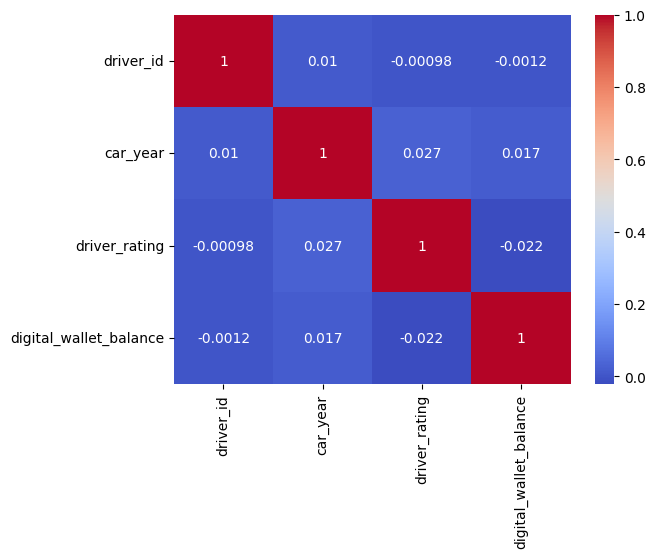

In [672]:
corr = sns.heatmap(drivers_data.corr( numeric_only = True),annot=True , cmap = 'coolwarm')

In [673]:
drivers_data['phone_number']

0            605.357.1440x219
1           (967)943-2945x225
2               (291)384-7363
3        +1-724-568-1542x3870
4          371.804.0744x93348
                ...          
9995          +1-805-270-6183
9996     001-461-583-7793x979
9997               9562974342
9998        (810)690-7393x352
9999    +1-747-562-6573x45243
Name: phone_number, Length: 10000, dtype: object

In [674]:
drivers_data[drivers_data['driver_id'] == 7360]

,driver_id,first_name,last_name,gender,nationality,iqama_id,phone_number,car_make,car_model,car_year,license_plate,car_type,signup_date,driver_rating,status,digital_wallet_balance
7359,7360,Patricia,Arroyo,Male,Sudanese,NaN,631.662.9845,Nissan,Resource,2018,S3659F,XL,2023-02-11,4.4,active,4873.24


In [675]:
drivers_data.groupby('car_make')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)


,mean,count
car_make,,
Kia,4.511370,1416
Toyota,4.511165,1433
Ford,4.510879,1342
Nissan,4.507947,1510
Chevrolet,4.506101,1426
Honda,4.497315,1378
Hyundai,4.484348,1495


In [676]:
drivers_data.groupby('car_year')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)


,mean,count
car_year,,
2023,4.521224,1013
2024,4.515848,997
2017,4.515731,998
2022,4.510822,998
2019,4.502632,988
2018,4.498841,949
2016,4.498373,1045
2021,4.498162,1034
2020,4.497951,1025


In [677]:
drivers_data.groupby('car_type')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)


,mean,count
car_type,,
bike,4.508504,2493
XL,4.508262,2554
economy,4.503537,2460
premium,4.495708,2493


In [678]:
drivers_data[drivers_data['car_type'] == 'premium'].groupby('car_make')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
car_make,,
Ford,4.513490,341
Kia,4.507951,327
Chevrolet,4.505030,338
Honda,4.502346,341
Toyota,4.497199,357
Nissan,4.486154,390
Hyundai,4.464912,399


In [679]:
# Filter the dataset for drivers with more than 1 issues in customer support data
filtered_drivers = drivers_data[drivers_data['driver_id'].isin(target_driver_ids)]

# Calculate the average rating
average_rating = filtered_drivers['driver_rating'].mean()

# Print the average rating
print("The average rating for drivers with more than 1 issues is:", average_rating)

The average rating for drivers with more than 1 issues is: 4.544489795918368


In [680]:
# Filter drivers with no complaints
no_complaint_drivers = drivers_data[~drivers_data['driver_id'].isin(Customer_support_data['driver_id'])]

# Display the result
no_complaint_drivers.head()

,driver_id,first_name,last_name,gender,nationality,iqama_id,phone_number,car_make,car_model,car_year,license_plate,car_type,signup_date,driver_rating,status,digital_wallet_balance
1,2,Cindy,Cook,Male,Bangladeshi,LVZW33111624546928,(967)943-2945x225,Toyota,Live,2019,S6399A,economy,2022-08-12,4.3,active,2212.73
2,3,Rachel,Castro,Male,Egyptian,XQDY78244428464936,(291)384-7363,Nissan,Vote,2021,S2788E,economy,2022-03-02,4.3,off-duty,782.52
3,4,Whitney,Pratt,Male,Saudi,HHJM88211090595255,+1-724-568-1542x3870,Chevrolet,Blood,2015,S9429F,bike,2024-09-25,4.1,active,4839.57
4,5,Danny,Davis,Male,Egyptian,UPPK32042181747291,371.804.0744x93348,Chevrolet,Later,2018,S4622A,bike,2023-10-26,4.4,off-duty,2855.09
5,6,Julie,Lee,Female,Bangladeshi,NaN,(423)433-6956x26845,Chevrolet,Any,2020,S5424A,XL,2022-12-12,4.6,off-duty,3061.89


In [681]:
no_complaint_drivers.groupby('car_type')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
car_type,,
bike,4.511885,1952
XL,4.507208,1984
economy,4.503312,1902
premium,4.493938,1930


In [682]:
no_complaint_drivers['driver_rating'].value_counts().sort_values( ascending=False)

driver_rating
4.8    803
4.5    796
4.2    788
4.6    785
4.7    780
4.4    770
4.3    765
4.9    765
4.1    731
5.0    402
4.0    383
Name: count, dtype: int64

In [683]:
no_complaint_drivers[no_complaint_drivers['driver_rating'] == 4.8].groupby('driver_id')['signup_date'].min().sort_values(ascending = True)

driver_id
4971    2021-09-01
8591    2021-09-01
7317    2021-09-02
6101    2021-09-04
3418    2021-09-05
           ...    
2602    2025-08-24
8635    2025-08-25
5797    2025-08-25
2762    2025-08-28
651     2025-08-29
Name: signup_date, Length: 803, dtype: object

In [684]:
Customer_support_drivers_merged_data = pd.merge(Customer_support_data, drivers_data, on='driver_id', how='inner')

Customer_support_drivers_merged_data.head()

,ticket_id,trip_id,user_id,driver_id,issue_category,status_x,resolution_time_minutes,time in hours,first_name,last_name,...,phone_number,car_make,car_model,car_year,license_plate,car_type,signup_date,driver_rating,status_y,digital_wallet_balance
0,1,33554,8851,7501,dispute,escalated,477.0,7.950000,Stephanie,Robinson,...,+1-852-230-7989x651,Kia,Next,2021,S4724E,XL,2022-02-02,4.3,active,1702.81
1,2,9428,3337,8514,dispute,escalated,430.0,7.166667,Mario,Byrd,...,7085627905,Hyundai,Environment,2016,S6125C,XL,2021-09-14,4.6,active,4533.56
2,3,200,18400,1169,dispute,open,1015.0,16.916667,Jennifer,Santana,...,829.848.9367,Honda,Suffer,2020,S3118C,premium,2023-12-04,4.3,off-duty,345.39
3,4,12448,7915,9629,dispute,escalated,1366.0,22.766667,Brandon,Brewer,...,+1-742-994-2741,Nissan,Organization,2020,S4675B,economy,2024-10-23,5.0,suspended,1234.60
4,5,39490,9417,3099,lost item,escalated,954.0,15.900000,Lisa,Peterson,...,+1-690-370-3620x0262,Kia,Year,2018,S8224C,XL,2021-11-22,4.5,active,658.78


In [685]:
suspended_drivers = Customer_support_drivers_merged_data[Customer_support_drivers_merged_data['status_y'] == 'suspended'].groupby('issue_category')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

suspended_drivers

,mean,count
issue_category,,
lost item,4.547239,163
payment issue,4.538462,156
app issue,4.525316,158
safety concern,4.500556,180
dispute,4.482716,162


In [686]:
suspended_drivers_problem_makers = Customer_support_drivers_merged_data[
    (Customer_support_drivers_merged_data['status_y'] == 'suspended') &
    (Customer_support_drivers_merged_data['driver_id'].isin(target_driver_ids))
].groupby('issue_category')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

suspended_drivers_problem_makers

,mean,count
issue_category,,
app issue,4.634483,29
lost item,4.617500,40
payment issue,4.578378,37
safety concern,4.540000,30
dispute,4.530952,42


In [687]:
target_driver_ids = Customer_support_drivers_merged_data[
    (Customer_support_drivers_merged_data['car_type'] == 'premium') &
    (Customer_support_drivers_merged_data['car_make'].isin(['Hyundai', 'Nissan', 'Toyota']))
]['driver_id'].to_list()


In [688]:
filtered_data = Customer_support_drivers_merged_data[
    Customer_support_drivers_merged_data['driver_id'].isin(target_driver_ids)
]

filtered_data.head()

,ticket_id,trip_id,user_id,driver_id,issue_category,status_x,resolution_time_minutes,time in hours,first_name,last_name,...,phone_number,car_make,car_model,car_year,license_plate,car_type,signup_date,driver_rating,status_y,digital_wallet_balance
27,28,30189,23363,2148,app issue,escalated,1246.0,20.766667,Margaret,Oneill,...,001-640-905-2611x966,Nissan,Charge,2023,S9861A,premium,2025-08-25,4.1,active,4601.46
36,37,49718,16429,8655,safety concern,open,534.0,8.900000,Lisa,Stark,...,(433)739-6456x805,Toyota,Team,2019,S3505E,premium,2025-05-19,4.6,off-duty,1805.19
65,66,20305,24671,1525,lost item,open,1316.0,21.933333,Joshua,Lopez,...,(871)447-0425,Toyota,Last,2015,S2153F,premium,2022-12-02,4.4,off-duty,3001.11
72,73,48493,16365,2091,dispute,resolved,1325.0,22.083333,Brenda,Frank,...,677-749-9169x53910,Nissan,Option,2023,S5963F,premium,2022-06-15,4.3,active,2914.39
78,79,17747,13605,5256,lost item,open,403.0,6.716667,Pamela,Bauer,...,+1-656-760-6958,Nissan,Financial,2023,S5852A,premium,2021-10-08,4.8,active,4921.44


In [689]:
(
    filtered_data
    .groupby('issue_category')[['resolution_time_minutes', 'time in hours']]
    .agg(['mean', 'count'])
    .sort_values(by=('resolution_time_minutes', 'mean'), ascending=False)
)


resolution_time_minutes       time in hours      
                                  mean count          mean count
issue_category                                                  
lost item                   773.923077    65     12.898718    65
payment issue               756.511111    45     12.608519    45
safety concern              739.980000    50     12.333000    50
app issue                   737.079365    63     12.284656    63
dispute                     727.224138    58     12.120402    58

In [690]:
filtered_data.groupby('driver_rating')['driver_rating'].count().sort_values(ascending=False)

driver_rating
4.2    35
4.8    33
4.5    32
4.6    28
4.4    28
4.7    27
4.9    25
4.1    24
4.3    23
4.0    14
5.0    12
Name: driver_rating, dtype: int64

## Observation :

* Nearly **30% of drivers** are missing **Iqama IDs**, and **0.1% have no car model** recorded.
* There are **compliance issues** with **Iqama ID, car model, and phone number format**.
* Drivers using **Honda and Hyundai** cars have **below-average ratings**.
* **Premium cars** (Hyundai, Nissan, Toyota) show **below-average ratings**, representing **\~47% of premium car drivers**.
* **11.25% of customer support issues** are related to **premium car drivers**.
* Drivers with **more than one customer support issue** still have **ratings above the overall average**.
* **8.2% of drivers are suspended** due to safety concerns; for **dispute-related issues**, ratings are below average, while others remain above average.
* Suspended drivers account for **\~33% of all customer support cases**, and **7.12% of drivers are both suspended and repeat problem-makers**.
* **High complaint driver**: Sudanese driver Patricia Arroyo needs follow-up due to frequent customer support issues.
* **Top-performing drivers** with no complaints include IDs: **4971, 8591, 7317, 6101, 3418**.

---

## Future Work :

1. Analyze **trips of premium cars** (Hyundai, Nissan, Toyota) to identify patterns in ratings, complaints, and performance.
2. Investigate **drivers with multiple complaints** to determine root causes and possible systemic issues.

---

## Recommendations :

1. Send reminders to drivers to **update Iqama ID, car model, and phone number** to improve compliance.
2. Provide **training and feedback** for drivers with **ratings below average** to enhance service quality.
3. **Reward top-performing drivers** (IDs: 4971, 8591, 7317, 6101, 3418) to encourage best practices and motivate others.

In [691]:
fares_data = pd.read_csv(r'E:\python projects\Datasets\careem\fares.csv')

fares_data.head()

,fare_id,trip_id,base_fare,distance_fare,time_fare,surge_fee,tolls,airport_fee,VAT,discount_applied,total_fare,payment_method,payout_to_driver,company_commission
0,3,3,12.14,25.57,9.18,65.65,6,0,17.78,0,136.32,Apple Pay,81.79,54.53
1,6,6,6.45,23.66,5.35,39.01,0,0,11.17,0,85.64,card,51.38,34.26
2,7,7,12.78,14.65,1.52,23.16,0,0,7.82,0,59.93,card,35.96,23.97
3,8,8,5.58,14.39,4.33,34.02,0,0,8.75,0,67.07,Mada,40.24,26.83
4,10,10,10.97,57.53,1.47,0.00,0,0,10.50,0,80.47,cash,48.28,32.19


In [692]:
fares_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16517 entries, 0 to 16516
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fare_id             16517 non-null  int64  
 1   trip_id             16517 non-null  int64  
 2   base_fare           16517 non-null  float64
 3   distance_fare       16517 non-null  float64
 4   time_fare           16517 non-null  float64
 5   surge_fee           16517 non-null  float64
 6   tolls               16517 non-null  int64  
 7   airport_fee         16517 non-null  int64  
 8   VAT                 16517 non-null  float64
 9   discount_applied    16517 non-null  int64  
 10  total_fare          16517 non-null  float64
 11  payment_method      16517 non-null  object 
 12  payout_to_driver    16517 non-null  float64
 13  company_commission  16517 non-null  float64
dtypes: float64(8), int64(5), object(1)
memory usage: 1.8+ MB


In [693]:
fares_data.isnull().sum()

fare_id               0
trip_id               0
base_fare             0
distance_fare         0
time_fare             0
surge_fee             0
tolls                 0
airport_fee           0
VAT                   0
discount_applied      0
total_fare            0
payment_method        0
payout_to_driver      0
company_commission    0
dtype: int64

In [694]:
fares_data.duplicated().sum()

np.int64(0)

In [695]:
fares_data.describe()

,fare_id,trip_id,base_fare,distance_fare,time_fare,surge_fee,tolls,airport_fee,VAT,discount_applied,total_fare,payout_to_driver,company_commission
count,16517.000000,16517.000000,16517.000000,16517.000000,16517.000000,16517.000000,16517.000000,16517.000000,16517.000000,16517.0,16517.000000,16517.000000,16517.000000
mean,24985.544469,24985.544469,9.990721,26.113997,6.506181,27.234869,0.241509,0.948720,10.655325,0.0,81.691322,49.014788,32.676533
std,14423.357290,14423.357290,2.875815,16.222905,3.865461,24.589395,1.270786,3.740715,5.345078,0.0,40.978900,24.587336,16.391565
min,3.000000,3.000000,5.000000,1.060000,0.500000,0.000000,0.000000,0.000000,1.350000,0.0,10.380000,6.230000,4.150000
25%,12436.000000,12436.000000,7.500000,12.980000,3.330000,6.560000,0.000000,0.000000,6.630000,0.0,50.830000,30.500000,20.330000
50%,25038.000000,25038.000000,10.010000,23.760000,5.920000,22.510000,0.000000,0.000000,9.590000,0.0,73.540000,44.120000,29.420000
75%,37477.000000,37477.000000,12.460000,37.070000,9.100000,42.030000,0.000000,0.000000,13.650000,0.0,104.630000,62.780000,41.850000
max,49996.000000,49996.000000,15.000000,74.420000,17.950000,138.360000,10.000000,20.000000,34.590000,0.0,265.190000,159.110000,106.080000


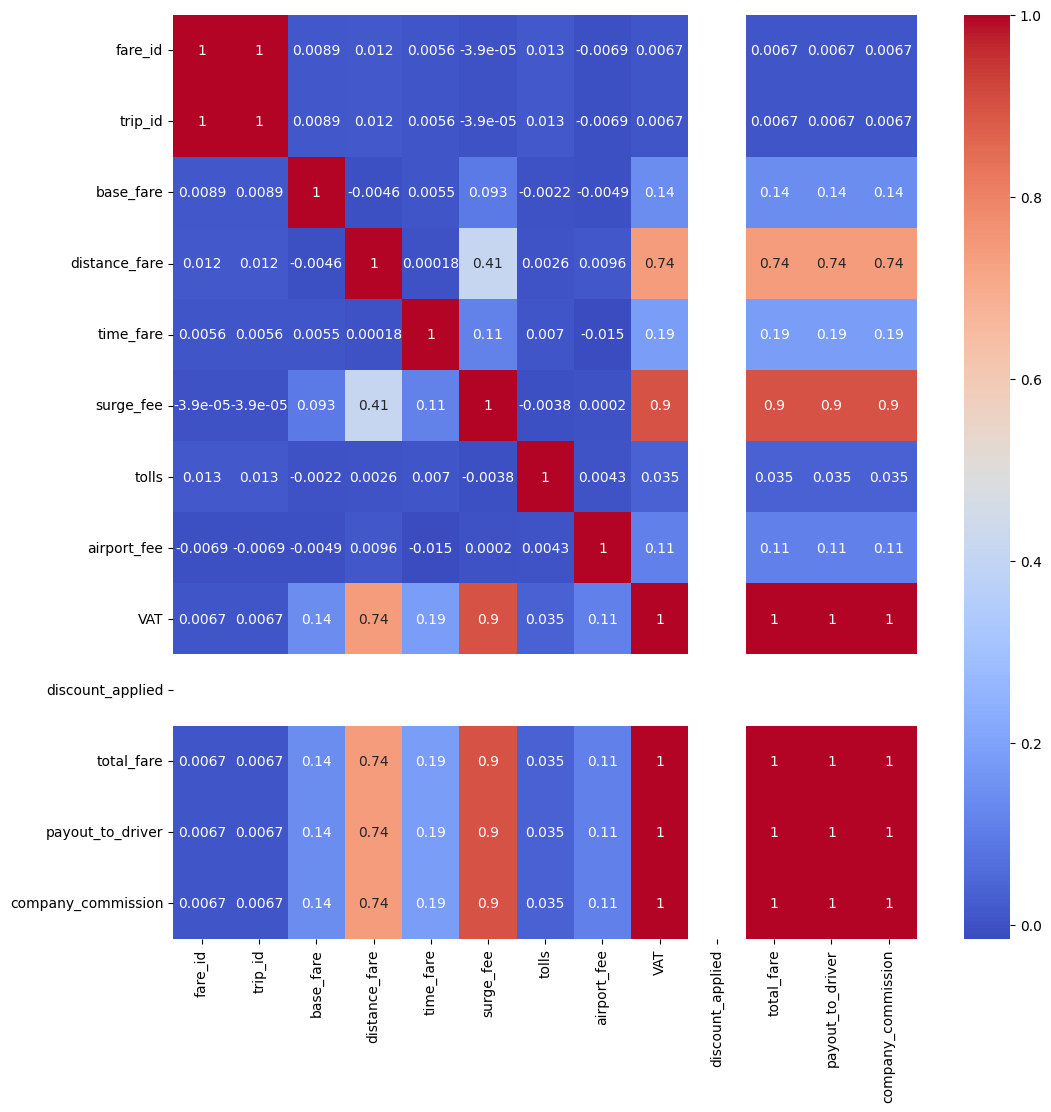

In [696]:
plt.figure(figsize=(12, 12)) 
fares_correlation = sns.heatmap(
    fares_data.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm'
)
plt.show()


In [697]:
fares_data[fares_data['trip_id'].isin([27879, 34235, 46321, 3920, 17736])]

,fare_id,trip_id,base_fare,distance_fare,time_fare,surge_fee,tolls,airport_fee,VAT,discount_applied,total_fare,payment_method,payout_to_driver,company_commission
5912,17736,17736,7.49,6.94,1.87,16.3,0,0,4.89,0,37.49,Mada,22.49,15.0


In [698]:
payment_method_fares = fares_data.groupby('payment_method')['total_fare'].sum().sort_values(ascending=False)
total_fares = payment_method_fares.sum()
print("Total fares by payment method:")
for method, total in payment_method_fares.items():
    percentage = (total / total_fares) * 100
    print(f"{method}: {total:,.2f} SAR ({percentage:.2f}%)")

Total fares by payment method:
Apple Pay: 275,122.13 SAR (20.39%)
cash: 271,603.37 SAR (20.13%)
Mada: 269,399.29 SAR (19.97%)
card: 268,017.75 SAR (19.86%)
wallet: 265,153.02 SAR (19.65%)


In [699]:
finacial_trip_merged_data = pd.merge(Customer_support_data, fares_data, on='trip_id', how='inner')

finacial_trip_merged_data.head()

,ticket_id,trip_id,user_id,driver_id,issue_category,status,resolution_time_minutes,time in hours,fare_id,base_fare,...,time_fare,surge_fee,tolls,airport_fee,VAT,discount_applied,total_fare,payment_method,payout_to_driver,company_commission
0,7,10823,2279,5254,dispute,resolved,893.0,14.883333,10823,8.86,...,1.20,0.00,0,0,3.18,0,24.39,Mada,14.63,9.76
1,12,38696,23245,4429,lost item,open,1039.0,17.316667,38696,8.49,...,7.20,12.11,0,0,4.84,0,37.14,Mada,22.28,14.86
2,13,6189,5748,3143,payment issue,open,206.0,3.433333,6189,7.69,...,7.77,0.00,0,0,8.81,0,67.52,Apple Pay,40.51,27.01
3,17,15178,24955,8268,safety concern,open,1436.0,23.933333,15178,8.67,...,2.70,26.75,0,0,14.04,0,107.67,wallet,64.60,43.07
4,19,12610,17203,9813,app issue,open,868.0,14.466667,12610,6.05,...,4.91,30.30,2,0,13.93,0,106.83,Apple Pay,64.10,42.73


In [700]:
finacial_trip_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticket_id                806 non-null    int64  
 1   trip_id                  806 non-null    int64  
 2   user_id                  806 non-null    int64  
 3   driver_id                806 non-null    int64  
 4   issue_category           806 non-null    object 
 5   status                   806 non-null    object 
 6   resolution_time_minutes  806 non-null    float64
 7   time in hours            806 non-null    float64
 8   fare_id                  806 non-null    int64  
 9   base_fare                806 non-null    float64
 10  distance_fare            806 non-null    float64
 11  time_fare                806 non-null    float64
 12  surge_fee                806 non-null    float64
 13  tolls                    806 non-null    int64  
 14  airport_fee              8

In [701]:
finacial_trip_merged_data.groupby('driver_id')['payout_to_driver'].sum().sort_values(ascending=False)

driver_id
185     160.26
1668    148.34
998     134.23
7754    134.19
2298    133.35
         ...  
9448     10.95
5559     10.78
5002      9.72
3199      8.75
48        7.40
Name: payout_to_driver, Length: 778, dtype: float64

In [702]:
company_commission_by_payment_method = fares_data.groupby('payment_method')['company_commission'].sum().sort_values(ascending=False)


print("Company commission by payment method:")
for method, pct in company_commission_by_payment_method.items():
    print(f"{method}: {pct:.2f} SAR")

Company commission by payment method:
Apple Pay: 110048.98 SAR
cash: 108641.16 SAR
Mada: 107759.62 SAR
card: 107207.04 SAR
wallet: 106061.50 SAR


In [703]:
payment_issue_counts = finacial_trip_merged_data[
    finacial_trip_merged_data['issue_category'] == 'payment issue'
]['payment_method'].value_counts(normalize=True) * 100


print("Percentage of payment issues by payment method:")
for method, pct in payment_issue_counts.items():
    print(f"{method}: {pct:.2f}% of payment issues")


Percentage of payment issues by payment method:
wallet: 28.48% of payment issues
card: 21.85% of payment issues
Apple Pay: 19.21% of payment issues
Mada: 15.89% of payment issues
cash: 14.57% of payment issues


In [704]:
payment_issue_counts = finacial_trip_merged_data[
    (finacial_trip_merged_data['issue_category'] == 'payment issue') &
    (finacial_trip_merged_data['status'].isin(['escalated']))
]['payment_method'].value_counts(normalize=True) * 100
print("Percentage of escalated payment issues by payment method:")
for method, pct in payment_issue_counts.items():
    print(f"{method}: {pct:.2f}% of escalated payment issues")


Percentage of escalated payment issues by payment method:
wallet: 28.30% of escalated payment issues
card: 24.53% of escalated payment issues
Apple Pay: 22.64% of escalated payment issues
Mada: 15.09% of escalated payment issues
cash: 9.43% of escalated payment issues


In [705]:
finacial_trip_merged_data['driver_id'].value_counts()

driver_id
1973    2
3895    2
7897    2
7055    2
2427    2
       ..
1378    1
3155    1
951     1
8117    1
5284    1
Name: count, Length: 778, dtype: int64

In [706]:
finacial_trip_merged_data['user_id'].value_counts()

user_id
14440    2
2806     2
13391    2
13413    2
22042    2
        ..
20225    1
11628    1
5096     1
15761    1
24955    1
Name: count, Length: 789, dtype: int64

## Observation :

* **Apple Pay** is the **most used payment method** (20.39% of fares), generating **≈110,048.98 SAR in commission**, but also records the **third-highest payment issue rate (19.21%)**.
* **Cash** is the **second most used method** (20.13% of fares) with the **lowest payment issue rate (14.57%)**, making it relatively reliable.
* **Card payments** account for **19.86% of fares**, also with the **lowest issue rate (14.57%)**.
* **Wallet payments** are the **least used (19.65% of fares)** but have the **highest issue rate (28.48%)** and **28.3% of escalated payment issues**, indicating technical challenges.
* **Driver complaints** are concentrated among IDs **1973, 3895, 7897, 7055, 2427**, each linked to multiple customer support cases.
* **User complaints** are concentrated among IDs **14440, 2806, 13391, 13413, 22042**, each with recurring issues.
* **Top revenue-generating drivers** are IDs **185, 1668, 998, 7754, 2298**.
* With **16,517 completed trips** and an **average commission of 32.7 SAR**, the **total company commission is ≈540K SAR**.
* A **stable commission band (25–40 SAR per trip)** dominates, ensuring consistent recurring revenue.
* However, the company is **heavily reliant on short, low-fare trips (4–20 SAR commission)**, which risks profitability if cancellations or discounts increase.
* **Surge fees, tolls, and airport trips** create commission spikes but remain **infrequent**, meaning they do not contribute to stable baseline income.

---

## Future Work :

1. **Deep-dive analysis of payment issues**, especially with Apple Pay and Wallet, to identify technical and operational root causes.
2. **Segmentation of driver and user complaints** to assess whether issues are due to service quality, app functionality, or fraudulent behavior.

---

## Recommendations :

1. **Enhance Apple Pay reliability** by ensuring **payment confirmation before trip completion**, reducing disputes and failed transactions.
2. **Fix Wallet technical issues** to encourage adoption and reduce the current high share of escalated payment failures.
3. **Diversify trip portfolio** by promoting higher-value trips (airport, surge, tolls) to reduce over-reliance on short, low-fare trips and stabilize long-term commission growth.

In [707]:
locations_data = pd.read_csv(r'E:\python projects\Datasets\careem\locations.csv')

locations_data.head()

,location_id,latitude,longitude,city,country,zone,landmark
0,1,23.809205,48.347427,Riyadh,Saudi Arabia,South Zone,Jeddah Corniche
1,2,24.311021,40.988700,Jeddah,Saudi Arabia,North Zone,Ithra
2,3,24.908413,44.867966,Khobar,Saudi Arabia,Central Zone,NaN
3,4,23.474405,41.205870,Medina,Saudi Arabia,North Zone,NaN
4,5,25.074305,47.407734,Yanbu,Saudi Arabia,Central Zone,Jeddah Corniche


In [708]:
locations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_id  500 non-null    int64  
 1   latitude     500 non-null    float64
 2   longitude    500 non-null    float64
 3   city         500 non-null    object 
 4   country      500 non-null    object 
 5   zone         500 non-null    object 
 6   landmark     143 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.5+ KB


In [709]:
locations_data.isnull().sum()

location_id      0
latitude         0
longitude        0
city             0
country          0
zone             0
landmark       357
dtype: int64

In [710]:
locations_data.duplicated().sum()

np.int64(0)

In [711]:
locations_data['city'].value_counts()

city
Dammam     85
Jeddah     67
Yanbu      60
Riyadh     60
Medina     59
Khobar     58
Dhahran    58
Makkah     53
Name: count, dtype: int64

In [712]:
# Merge trips_data with locations_data to map pickup_location_id to city names
trips_locations_data = pd.merge(trips_data, locations_data[['location_id', 'city']], left_on='pickup_location_id', right_on='location_id', how='left')

# Group trips by city and calculate the total number of trips
city_trip_counts = trips_locations_data.groupby('city')['trip_id'].count().reset_index()

# Calculate the total number of trips
total_trips = city_trip_counts['trip_id'].sum()

# Calculate the percentage of trips for each city
city_trip_counts['percentage'] = (city_trip_counts['trip_id'] / total_trips) * 100

# Print the results
print("Total number of trips:", total_trips)
print("\nPercentage of trips by city:")
print(city_trip_counts[['city', 'percentage']])

Total number of trips: 50000

Percentage of trips by city:
      city  percentage
0   Dammam      16.674
1  Dhahran      11.954
2   Jeddah      13.292
3   Khobar      11.598
4   Makkah      10.612
5   Medina      11.756
6   Riyadh      12.116
7    Yanbu      11.998


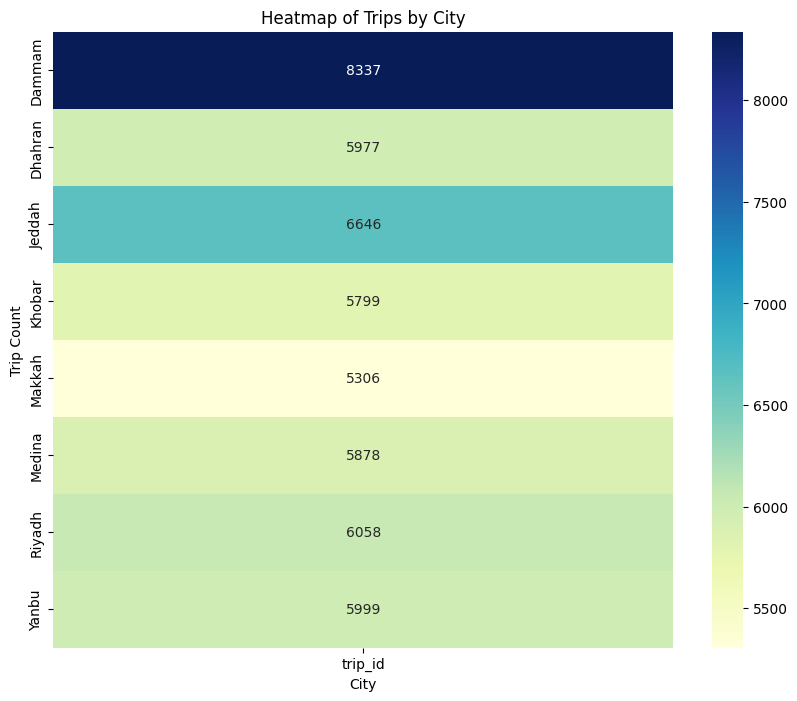

In [713]:
# Create a pivot table for city and trip counts
city_trip_pivot = trips_locations_data.pivot_table(index='city', values='trip_id', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(city_trip_pivot, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Trips by City')
plt.xlabel('City')
plt.ylabel('Trip Count')
plt.show()

In [714]:
# Merge fares and trips data to analyze profitability by city and ride type
profitability_data = pd.merge(fares_trip_merged_data, locations_data[['location_id', 'city']], left_on='pickup_location_id', right_on='location_id', how='left')

# Group by city and ride type to calculate total commission and total fare
profitability_by_city_ride = profitability_data.groupby(['city', 'ride_type']).agg(
    total_commission=('company_commission', 'sum'),
    total_fare=('total_fare', 'sum')
).reset_index()

# Calculate margin as a percentage of total fare
profitability_by_city_ride['margin_percentage'] = (
    profitability_by_city_ride['total_commission'] / profitability_by_city_ride['total_fare'] * 100
)

# Sort by margin percentage in descending order
profitability_by_city_ride = profitability_by_city_ride.sort_values(by='margin_percentage', ascending=False)

print("Profitability by City and Ride Type:")
print(profitability_by_city_ride)

Profitability by City and Ride Type:
       city ride_type  total_commission  total_fare  margin_percentage
30   Riyadh        XL          14209.56    35523.58          40.000360
11   Jeddah      bike          15521.97    38804.60          40.000335
8   Dhahran   premium          12394.18    30985.27          40.000232
38    Yanbu   premium          11951.74    29879.20          40.000201
24   Makkah     share          11640.64    29101.47          40.000179
6   Dhahran      bike          12287.75    30719.25          40.000163
28   Medina   premium          12970.30    32425.62          40.000160
5   Dhahran        XL          13401.72    33504.17          40.000155
9   Dhahran     share          12625.23    31562.96          40.000146
13   Jeddah   premium          13559.54    33898.73          40.000142
16   Khobar      bike          12529.57    31323.84          40.000109
31   Riyadh      bike          12292.14    30730.28          40.000091
19   Khobar     share          12700.01 

In [715]:
locations_data[locations_data['location_id'].isin([395, 94, 149, 284, 118])]


,location_id,latitude,longitude,city,country,zone,landmark
93,94,24.603849,43.171686,Dhahran,Saudi Arabia,East Zone,NaN
117,118,25.428963,45.428518,Makkah,Saudi Arabia,North Zone,Kingdom Centre
148,149,26.248830,43.618815,Jeddah,Saudi Arabia,North Zone,Mall of Arabia
283,284,22.880088,41.802674,Dhahran,Saudi Arabia,East Zone,NaN
394,395,22.540849,40.986051,Riyadh,Saudi Arabia,Central Zone,Ithra


In [716]:
locations_data[locations_data['location_id'].isin ([218 ,438 ,42 ,403 ,131 ])]

,location_id,latitude,longitude,city,country,zone,landmark
41,42,22.193266,43.568862,Dammam,Saudi Arabia,Central Zone,NaN
130,131,21.792216,47.769899,Makkah,Saudi Arabia,West Zone,NaN
217,218,26.762934,42.429727,Yanbu,Saudi Arabia,West Zone,NaN
402,403,23.254039,44.546098,Dammam,Saudi Arabia,East Zone,NaN
437,438,24.782786,45.575488,Yanbu,Saudi Arabia,West Zone,NaN


## **Observation :**

* **Dammam (85)** and **Jeddah (67)** have the **highest number of locations**, making them the most active cities.
* **Dhahran (58)** and **Makkah (53)** have the **fewest locations**, suggesting lower coverage or demand.
* **Top pickup locations** include **Ithra, Mall of Arabia, and Kingdom Centre**, highlighting popular commercial and cultural hubs.
* **Top drop-off locations** are IDs: **218, 438, 42, 403, 131**, representing high-demand destinations.
* Out of **50,000 total trips**, the highest share comes from **Dammam (16.7%)** and **Jeddah (13.3%)**, while **Makkah (10.6%)** has the lowest share.
* **Profitability is consistent across all cities and ride types (\~40% margin)**, with strong contributions from **Dammam (Economy & XL), Jeddah (Bike & Premium), and Riyadh (XL & Economy)**.
* Heavy reliance on **Economy and XL rides** across multiple cities ensures stable commission inflows.

---

## **Future Work :**

1. **Map geographic distribution of trips and margins** to identify which low-volume cities (like Makkah, Medina) could benefit from supply-side interventions (e.g., more drivers, pricing strategies).
2. **Analyze ride type profitability by city** (e.g., why Premium is strong in Dhahran and Yanbu vs. weak in Makkah).
3. **Study demand elasticity** by testing targeted discounts or promotions in low-share cities like Makkah to increase adoption.

---

## **Recommendations :**

1. **Strengthen operations in high-volume cities (Dammam & Jeddah)** → match driver supply to demand, particularly in top pickup/drop-off hubs like malls and cultural centers.
2. **Improve service coverage in Dhahran & Makkah** through **targeted marketing, partnerships, or dynamic pricing** to boost adoption.
3. **Leverage high-demand ride types (Economy & XL)** → allocate more drivers to these categories in top cities (Dammam, Riyadh, Jeddah) to capture stable revenue.
4. **Capitalize on Premium & Bike success in Dhahran, Yanbu, and Jeddah** by tailoring campaigns to riders who prefer comfort or quick short trips.
5. **Standardize \~40% margin model** across cities but focus on **volume growth in underperforming locations** rather than margin optimization (since profitability is already consistent).


In [717]:
promotions_data = pd.read_csv(r'E:\python projects\Datasets\careem\promotions.csv')

promotions_data.head()

,promo_id,promo_code,discount_type,discount_value,start_date,end_date,eligibility_criteria
0,1,INTO70,flat,5,2024-11-06 14:55:55.206603,2025-11-05 14:55:55.206603,loyalty tier
1,2,ITEM72,flat,10,2025-01-17 03:32:56.430690,2025-06-02 03:32:56.430690,loyalty tier
2,3,DISCOVER42,percent,10,2024-12-03 22:53:33.528991,2025-10-28 22:53:33.528991,city-specific
3,4,HOME77,flat,20,2024-09-16 07:03:01.908592,2025-06-24 07:03:01.908592,new users
4,5,MAJOR63,flat,5,2024-10-20 11:51:39.721751,2025-09-01 11:51:39.721751,loyalty tier


In [718]:
promotions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   promo_id              50 non-null     int64 
 1   promo_code            50 non-null     object
 2   discount_type         50 non-null     object
 3   discount_value        50 non-null     int64 
 4   start_date            50 non-null     object
 5   end_date              50 non-null     object
 6   eligibility_criteria  50 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


In [719]:
promotions_data.isnull().sum()

promo_id                0
promo_code              0
discount_type           0
discount_value          0
start_date              0
end_date                0
eligibility_criteria    0
dtype: int64

In [720]:
promotions_data.duplicated().sum()

np.int64(0)

In [721]:
promotions_data['discount_value'].describe()

count    50.000000
mean     13.300000
std       6.027996
min       5.000000
25%      10.000000
50%      10.000000
75%      15.000000
max      25.000000
Name: discount_value, dtype: float64

In [722]:
promotions_data['start_date'] = pd.to_datetime(promotions_data['start_date'])
promotions_data['end_date'] = pd.to_datetime(promotions_data['end_date'])
promotions_data['duration'] = (promotions_data['end_date'] - promotions_data['start_date']).dt.days

In [723]:
promotions_data.groupby('eligibility_criteria')['discount_value'].mean().sort_values(ascending=False)

eligibility_criteria
new users        16.153846
city-specific    12.941176
all users        12.142857
loyalty tier     11.538462
Name: discount_value, dtype: float64

In [724]:
promotions_data.groupby('eligibility_criteria')['duration'].mean().sort_values(ascending=False)

eligibility_criteria
loyalty tier     243.307692
new users        226.923077
city-specific    200.470588
all users        170.571429
Name: duration, dtype: float64

In [725]:
promotions_data.groupby('discount_type')['discount_value'].mean().sort_values(ascending=False)

discount_type
percent    14.583333
flat       12.115385
Name: discount_value, dtype: float64

In [726]:
promotions_data.groupby('discount_type')['duration'].mean().sort_values(ascending=False)

discount_type
flat       230.307692
percent    196.958333
Name: duration, dtype: float64

In [727]:
promotion_lists = promotions_data.groupby('discount_type')['promo_id'].apply(list).to_dict()

promotion_lists

{'flat': [1,
  2,
  4,
  5,
  6,
  7,
  8,
  13,
  18,
  19,
  20,
  22,
  25,
  26,
  27,
  28,
  31,
  35,
  38,
  39,
  40,
  41,
  43,
  47,
  48,
  50],
 'percent': [3,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  21,
  23,
  24,
  29,
  30,
  32,
  33,
  34,
  36,
  37,
  42,
  44,
  45,
  46,
  49]}

In [728]:
trips_data = pd.read_csv(r'E:\python projects\Datasets\careem\trips.csv')

trips_data.head()

,trip_id,user_id,driver_id,request_time,pickup_time,dropoff_time,pickup_location_id,dropoff_location_id,waiting_time_minutes,distance_km,duration_minutes,ride_type,trip_status,surge_multiplier,cancellation_reason
0,1,11945,4618,2025-03-28 02:55:35.466375,2025-03-28 03:03:35.466375,NaN,172,71,5,28.63,36,economy,no-show,1.1,no_driver_found
1,2,18134,7604,2025-03-26 15:15:55.017793,2025-03-26 15:19:55.017793,NaN,269,262,0,17.19,59,premium,no-show,2.5,NaN
2,3,15958,2758,2024-10-10 21:39:17.671534,2024-10-10 21:48:17.671534,2024-10-10 22:19:17.671534,426,149,1,25.52,31,XL,completed,2.4,NaN
3,4,18343,4929,2023-09-24 07:54:10.928729,2023-09-24 07:57:10.928729,NaN,191,304,0,15.72,59,bike,no-show,1.8,user_canceled
4,5,3641,4044,2025-01-21 00:21:43.456258,2025-01-21 00:31:43.456258,NaN,259,164,3,23.65,59,bike,no-show,1.0,driver_too_far


In [729]:
trips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trip_id               50000 non-null  int64  
 1   user_id               50000 non-null  int64  
 2   driver_id             50000 non-null  int64  
 3   request_time          50000 non-null  object 
 4   pickup_time           50000 non-null  object 
 5   dropoff_time          16517 non-null  object 
 6   pickup_location_id    50000 non-null  int64  
 7   dropoff_location_id   50000 non-null  int64  
 8   waiting_time_minutes  50000 non-null  int64  
 9   distance_km           50000 non-null  float64
 10  duration_minutes      50000 non-null  int64  
 11  ride_type             50000 non-null  object 
 12  trip_status           50000 non-null  object 
 13  surge_multiplier      50000 non-null  float64
 14  cancellation_reason   25057 non-null  object 
dtypes: float64(2), int6

In [730]:
trips_data.isnull().sum()

trip_id                     0
user_id                     0
driver_id                   0
request_time                0
pickup_time                 0
dropoff_time            33483
pickup_location_id          0
dropoff_location_id         0
waiting_time_minutes        0
distance_km                 0
duration_minutes            0
ride_type                   0
trip_status                 0
surge_multiplier            0
cancellation_reason     24943
dtype: int64

In [731]:
trips_data.duplicated().sum()

np.int64(0)

In [732]:
trips_data['pickup_location_id'].value_counts()

pickup_location_id
395    136
94     135
149    132
284    129
118    127
      ... 
439     76
475     75
279     74
293     73
129     71
Name: count, Length: 500, dtype: int64

In [733]:
trips_data['dropoff_location_id'].value_counts()

dropoff_location_id
218    132
438    128
42     126
403    125
131    124
      ... 
423     78
404     77
332     76
276     76
179     69
Name: count, Length: 500, dtype: int64

In [734]:
trips_data['ride_type'].value_counts()

ride_type
XL         10165
economy    10039
bike        9947
premium     9929
share       9920
Name: count, dtype: int64

In [735]:
trips_data.groupby('ride_type')[['waiting_time_minutes', 'distance_km','duration_minutes']].mean().sort_values(by='waiting_time_minutes', ascending=False)


,waiting_time_minutes,distance_km,duration_minutes
ride_type,,,
bike,2.523877,26.235926,32.664723
XL,2.513035,26.025138,32.413674
economy,2.495468,26.083003,32.363383
premium,2.489777,25.951278,32.443448
share,2.475806,25.980611,32.686895


In [736]:
trip_status_counts = trips_data['trip_status'].value_counts()
trip_status_percent = (trip_status_counts / len(trips_data)) * 100

print("Trip Status Counts:")
print(trip_status_counts)
print("\nPercentage of Total Records:")
print(trip_status_percent)

Trip Status Counts:
trip_status
canceled     16800
no-show      16683
completed    16517
Name: count, dtype: int64

Percentage of Total Records:
trip_status
canceled     33.600
no-show      33.366
completed    33.034
Name: count, dtype: float64


In [737]:
trips_data.groupby('trip_status')['waiting_time_minutes'].mean().sort_values(ascending=False)

trip_status
canceled     2.508631
no-show      2.506444
completed    2.483683
Name: waiting_time_minutes, dtype: float64

In [738]:
trips_data['request_time'] = pd.to_datetime(trips_data['request_time'])
trips_data['pickup_time'] = pd.to_datetime(trips_data['pickup_time'])
trips_data['dropoff_time'] = pd.to_datetime(trips_data['dropoff_time'])

In [739]:
# Group by month and calculate total trips
monthly_trips = (
    trips_data.groupby(trips_data['request_time'].dt.to_period('M'))['trip_id']
    .count()
    .reset_index()
    .rename(columns={'trip_id': 'Total Trips'})
)
monthly_trips['Month'] = monthly_trips['request_time'].dt.to_timestamp()
monthly_trips = monthly_trips.sort_values('Month')

# Calculate MoM % change
monthly_trips['MoM %'] = monthly_trips['Total Trips'].pct_change() * 100

# Calculate YoY % change
monthly_trips['YoY %'] = monthly_trips['Total Trips'].pct_change(12) * 100

print(monthly_trips)

   request_time  Total Trips      Month      MoM %      YoY %
0       2023-09         1915 2023-09-01        NaN        NaN
1       2023-10         2139 2023-10-01  11.697128        NaN
2       2023-11         2035 2023-11-01  -4.862085        NaN
3       2023-12         2111 2023-12-01   3.734644        NaN
4       2024-01         2140 2024-01-01   1.373757        NaN
5       2024-02         1994 2024-02-01  -6.822430        NaN
6       2024-03         2155 2024-03-01   8.074223        NaN
7       2024-04         2055 2024-04-01  -4.640371        NaN
8       2024-05         2093 2024-05-01   1.849148        NaN
9       2024-06         2115 2024-06-01   1.051123        NaN
10      2024-07         2172 2024-07-01   2.695035        NaN
11      2024-08         2165 2024-08-01  -0.322284        NaN
12      2024-09         2054 2024-09-01  -5.127021   7.258486
13      2024-10         2155 2024-10-01   4.917235   0.748013
14      2024-11         2078 2024-11-01  -3.573086   2.113022
15      

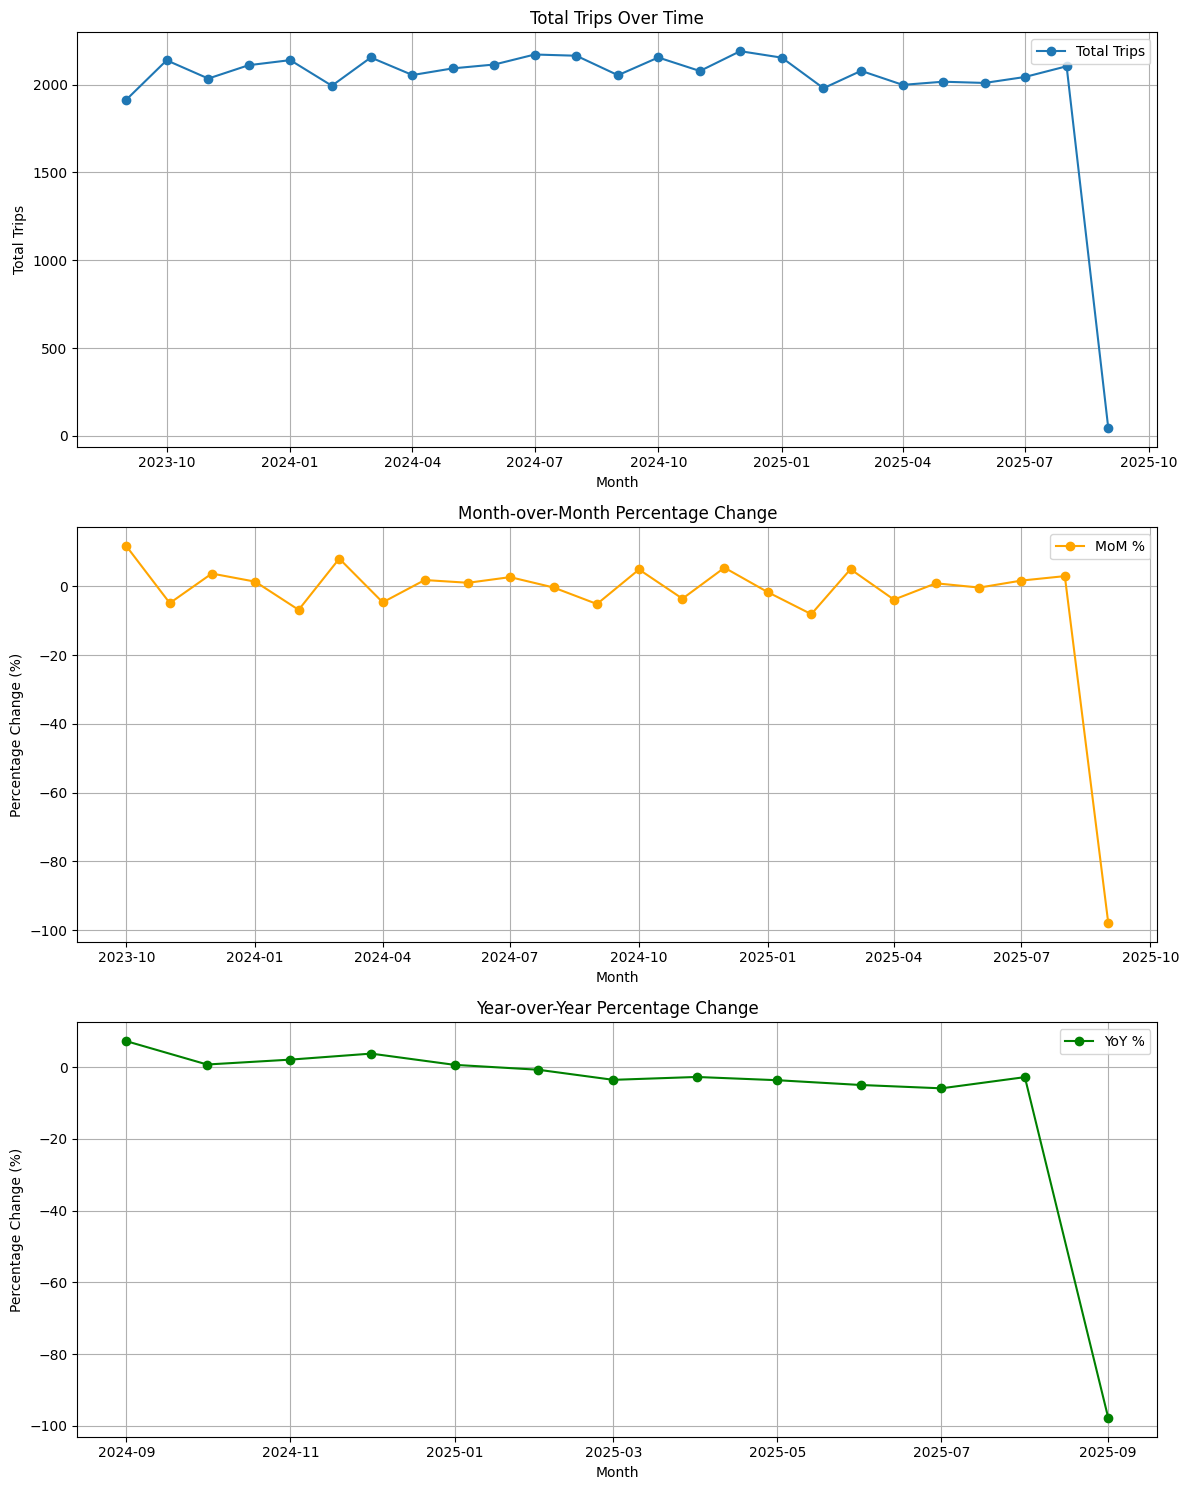

In [740]:

# Plot total trips, MoM, and YoY trends
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Total Trips plot
ax[0].plot(monthly_trips['Month'], monthly_trips['Total Trips'], marker='o', label='Total Trips')
ax[0].set_title('Total Trips Over Time')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total Trips')
ax[0].legend()
ax[0].grid(True)

# MoM % plot
ax[1].plot(monthly_trips['Month'], monthly_trips['MoM %'], marker='o', label='MoM %', color='orange')
ax[1].set_title('Month-over-Month Percentage Change')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage Change (%)')
ax[1].legend()
ax[1].grid(True)

# YoY % plot
ax[2].plot(monthly_trips['Month'], monthly_trips['YoY %'], marker='o', label='YoY %', color='green')
ax[2].set_title('Year-over-Year Percentage Change')
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Percentage Change (%)')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()

In [741]:
trips_data[trips_data['dropoff_time'].isnull() & trips_data['trip_status'].isin(['completed'])]

,trip_id,user_id,driver_id,request_time,pickup_time,dropoff_time,pickup_location_id,dropoff_location_id,waiting_time_minutes,distance_km,duration_minutes,ride_type,trip_status,surge_multiplier,cancellation_reason


In [742]:
trips_data[trips_data['trip_id'].isin([27879, 34235, 46321, 3920, 17736])]

,trip_id,user_id,driver_id,request_time,pickup_time,dropoff_time,pickup_location_id,dropoff_location_id,waiting_time_minutes,distance_km,duration_minutes,ride_type,trip_status,surge_multiplier,cancellation_reason
3919,3920,5732,7360,2024-02-08 06:22:43.276277,2024-02-08 06:30:43.276277,NaT,408,100,1,20.24,59,premium,canceled,2.0,no_driver_found
17735,17736,5047,7360,2025-08-15 19:01:24.729748,2025-08-15 19:06:24.729748,2025-08-15 19:20:24.729748,289,62,2,4.65,14,bike,completed,2.0,NaN
27878,27879,8763,7360,2024-11-22 22:12:25.243627,2024-11-22 22:17:25.243627,NaT,414,49,5,41.39,51,economy,canceled,1.8,no_driver_found
34234,34235,7137,7360,2023-12-14 23:54:32.909171,2023-12-14 23:56:32.909171,NaT,282,166,4,3.25,56,bike,no-show,1.5,no_driver_found
46320,46321,19933,7360,2025-08-20 12:40:16.357980,2025-08-20 12:46:16.357980,NaT,242,219,5,9.67,53,share,no-show,1.0,user_canceled


In [743]:
trip_promotions_data = pd.read_csv(r'E:\python projects\Datasets\careem\trip_promotions.csv')

trip_promotions_data.head()

,trip_promo_id,trip_id,promo_id,discount_applied
0,1,984,31,9.21
1,2,29372,6,13.50
2,3,14634,39,2.44
3,4,18868,22,7.78
4,5,13747,11,7.19


In [744]:
trip_promotions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trip_promo_id     1652 non-null   int64  
 1   trip_id           1652 non-null   int64  
 2   promo_id          1652 non-null   int64  
 3   discount_applied  1652 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 51.8 KB


In [745]:
trip_promotions_data.isnull().sum()

trip_promo_id       0
trip_id             0
promo_id            0
discount_applied    0
dtype: int64

In [746]:
trip_promotions_data.duplicated().sum()

np.int64(0)

In [747]:
percent_promo_id = [3,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  21,
  23,
  24,
  29,
  30,
  32,
  33,
  34,
  36,
  37,
  42,
  44,
  45,
  46,
  49]


trip_promotions_data = trip_promotions_data[trip_promotions_data['promo_id'].isin(percent_promo_id)]

trip_promotions_data.head()

,trip_promo_id,trip_id,promo_id,discount_applied
4,5,13747,11,7.19
6,7,49111,9,4.38
7,8,28631,12,7.46
11,12,16404,46,12.92
12,13,3707,46,4.44


Promo Trips: 804 (4.9%)
Total Discounts Given: SAR 6,607.72
Average ROI Across Promos: 799.98%


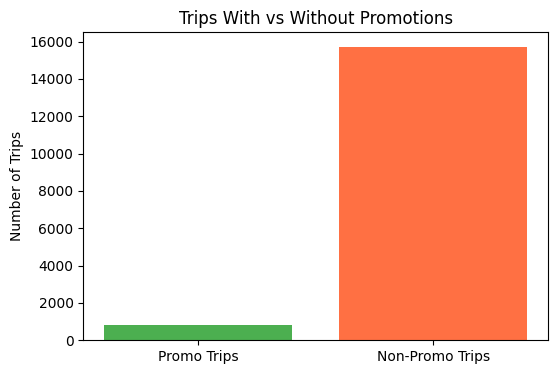

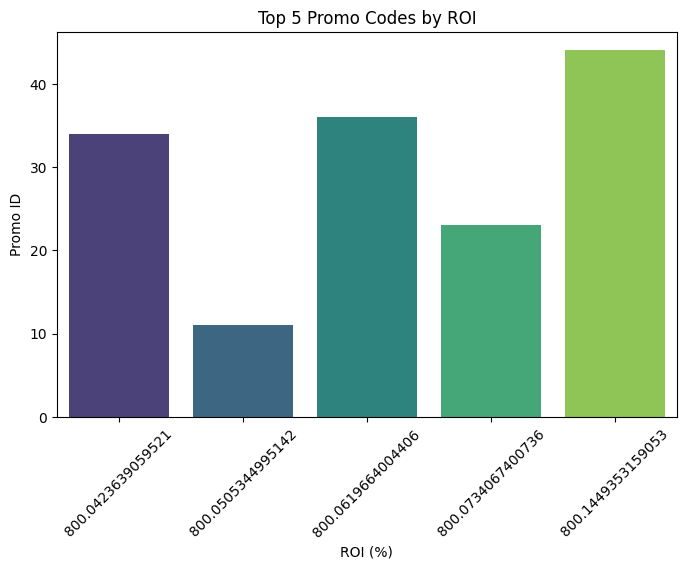

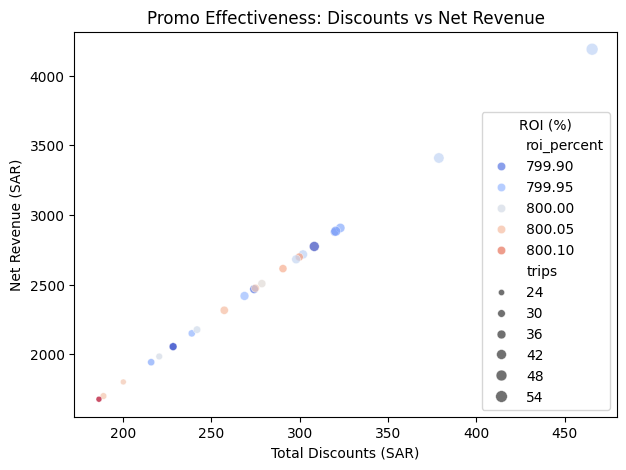

In [748]:
# --- 1. Merge promos with fares ---
promo_trip_data = pd.merge(
    fares_trip_merged_data[['trip_id', 'total_fare', 'payment_method']],
    trip_promotions_data,
    on='trip_id',
    how='inner'
)

# --- 2. Calculate net revenue after discount ---
promo_trip_data['revenue_after_discount'] = promo_trip_data['total_fare'] - promo_trip_data['discount_applied']

# --- 3. Summarize ---
promo_summary = promo_trip_data.groupby('promo_id').agg(
    trips=('trip_id', 'count'),
    total_fare=('total_fare', 'sum'),
    discount=('discount_applied', 'sum'),
    net_revenue=('revenue_after_discount', 'sum')
).reset_index()

# ROI = (Net Revenue - (Revenue without promo baseline?)) / Discount
# Here we'll measure effectiveness as Net Revenue / Discount
promo_summary['roi_percent'] = (promo_summary['net_revenue'] - promo_summary['discount']) / promo_summary['discount'] * 100

# --- 4. Top 5 promo codes ---
top_promos = promo_summary.sort_values(by='roi_percent', ascending=False).head(5)

# --- 5. KPIs ---
total_trips = fares_trip_merged_data['trip_id'].nunique()
promo_trips = promo_trip_data['trip_id'].nunique()
promo_share = (promo_trips / total_trips) * 100

print(f"Promo Trips: {promo_trips:,} ({promo_share:.1f}%)")
print(f"Total Discounts Given: SAR {promo_summary['discount'].sum():,.2f}")
print(f"Average ROI Across Promos: {promo_summary['roi_percent'].mean():.2f}%")

# --- 6. Visualization ---

# a) Trips with vs without promo
trip_counts = [promo_trips, total_trips - promo_trips]
labels = ['Promo Trips', 'Non-Promo Trips']

plt.figure(figsize=(6,4))
plt.bar(labels, trip_counts, color=['#4CAF50','#FF7043'])
plt.title("Trips With vs Without Promotions")
plt.ylabel("Number of Trips")
plt.show()

# b) Top 5 Promos by ROI
plt.figure(figsize=(8,5))
sns.barplot(
    data=top_promos,
    x='roi_percent',
    y='promo_id',
    palette='viridis'
)
plt.title("Top 5 Promo Codes by ROI")
plt.xlabel("ROI (%)")
plt.xticks(rotation=45)
plt.ylabel("Promo ID")
plt.show()

# c) Discounts vs Net Revenue (scatter)
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=promo_summary,
    x='discount',
    y='net_revenue',
    size='trips',
    hue='roi_percent',
    palette='coolwarm',
    alpha=0.7
)
plt.title("Promo Effectiveness: Discounts vs Net Revenue")
plt.xlabel("Total Discounts (SAR)")
plt.ylabel("Net Revenue (SAR)")
plt.legend(title="ROI (%)")
plt.show()


In [749]:
trip_promotions_data[trip_promotions_data['promo_id'].isin(percent_promo_id)]['discount_applied'].sum()

print(f"Total discount applied for percent discounts: SAR {trip_promotions_data[trip_promotions_data['promo_id'].isin(percent_promo_id)]['discount_applied'].sum():,.2f}")

Total discount applied for percent discounts: SAR 6,607.72


In [751]:
Customer_support_trip_merged_data = pd.merge(Customer_support_drivers_merged_data, trips_data, on='trip_id', how='inner')

Customer_support_trip_merged_data.head()

,ticket_id,trip_id,user_id_x,driver_id_x,issue_category,status_x,resolution_time_minutes,time in hours,first_name,last_name,...,dropoff_time,pickup_location_id,dropoff_location_id,waiting_time_minutes,distance_km,duration_minutes,ride_type,trip_status,surge_multiplier,cancellation_reason
0,1,33554,8851,7501,dispute,escalated,477.0,7.950000,Stephanie,Robinson,...,NaT,15,28,5,21.51,37,XL,canceled,1.0,driver_too_far
1,2,9428,3337,8514,dispute,escalated,430.0,7.166667,Mario,Byrd,...,NaT,423,355,2,3.26,48,share,no-show,1.0,no_driver_found
2,3,200,18400,1169,dispute,open,1015.0,16.916667,Jennifer,Santana,...,NaT,432,69,2,31.74,37,share,canceled,1.0,driver_too_far
3,4,12448,7915,9629,dispute,escalated,1366.0,22.766667,Brandon,Brewer,...,NaT,452,120,1,29.31,36,XL,canceled,1.2,no_driver_found
4,5,39490,9417,3099,lost item,escalated,954.0,15.900000,Lisa,Peterson,...,NaT,249,157,4,20.83,10,XL,canceled,2.1,NaN


In [752]:
Customer_support_trip_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ticket_id                2500 non-null   int64         
 1   trip_id                  2500 non-null   int64         
 2   user_id_x                2500 non-null   int64         
 3   driver_id_x              2500 non-null   int64         
 4   issue_category           2500 non-null   object        
 5   status_x                 2500 non-null   object        
 6   resolution_time_minutes  2500 non-null   float64       
 7   time in hours            2500 non-null   float64       
 8   first_name               2500 non-null   object        
 9   last_name                2500 non-null   object        
 10  gender                   2500 non-null   object        
 11  nationality              2500 non-null   object        
 12  iqama_id                 1740 non-

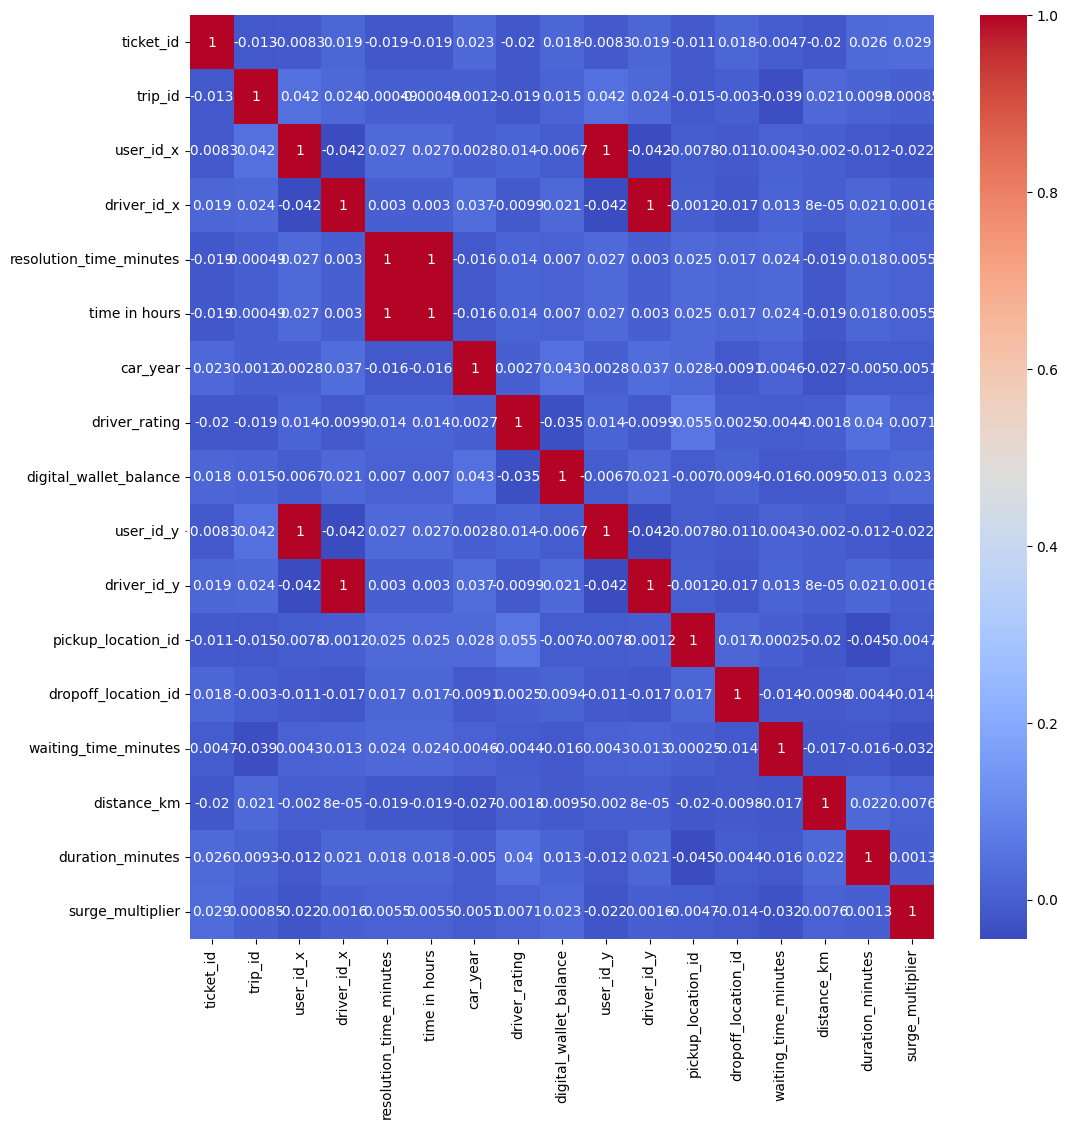

In [753]:
plt.figure(figsize=(12, 12))
sns.heatmap(Customer_support_trip_merged_data.corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.show()

In [754]:
Customer_support_trip_merged_data[Customer_support_trip_merged_data['trip_status'] == 'completed'].groupby('issue_category')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
issue_category,,
payment issue,4.549669,151
lost item,4.519136,162
app issue,4.500658,152
safety concern,4.485227,176
dispute,4.469091,165


In [755]:
filtered_data = Customer_support_trip_merged_data[
    (Customer_support_trip_merged_data['trip_status'] == 'completed') &
    (Customer_support_trip_merged_data['driver_id_x'].isin(target_driver_ids))
]

# Step 3: Group by issue category and analyze driver ratings
result = filtered_data.groupby('issue_category')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

# Display the result
print(result)

                    mean  count
issue_category                 
payment issue   4.692308     13
app issue       4.555000     20
safety concern  4.547059     17
lost item       4.515789     19
dispute         4.386364     22


In [756]:
# Filter drivers with rating below 4.5
low_rating_data = filtered_data[filtered_data['driver_rating'] < 4.5]

# Group by driver and calculate average rating and count
grouped = low_rating_data.groupby('driver_id_x')['driver_rating'].agg(['mean', 'count'])

# Sort by average rating in descending order
sorted_grouped = grouped.sort_values(by='mean', ascending=False)

# Display the result
print(sorted_grouped)


             mean  count
driver_id_x             
163           4.4      1
185           4.4      2
709           4.4      1
1525          4.4      1
1423          4.4      1
8219          4.4      1
9622          4.4      1
6140          4.4      1
7194          4.4      1
9168          4.4      1
4035          4.3      1
4446          4.3      1
1575          4.3      1
3032          4.3      1
2761          4.3      1
4408          4.3      1
7547          4.3      1
3469          4.3      1
2091          4.3      1
9016          4.2      1
5058          4.2      1
8875          4.2      1
8215          4.2      1
3160          4.2      1
4914          4.2      1
2751          4.2      1
8210          4.2      1
7679          4.2      1
8812          4.2      1
8156          4.1      1
7754          4.1      2
978           4.1      1
6320          4.1      1
683           4.0      1
437           4.0      1
8189          4.0      1
8124          4.0      1


In [757]:
canceled_complaints = Customer_support_trip_merged_data[Customer_support_trip_merged_data['trip_status'] == 'canceled'].groupby('issue_category')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

canceled_complaints

,mean,count
issue_category,,
lost item,4.546237,186
payment issue,4.514094,149
app issue,4.478286,175
dispute,4.478182,165
safety concern,4.454945,182


In [758]:
cancelled_filtered_data = Customer_support_trip_merged_data[
    (Customer_support_trip_merged_data['trip_status'] == 'canceled') &
    (Customer_support_trip_merged_data['driver_id_x'].isin(target_driver_ids))
]

# Step 3: Group by issue category and analyze driver ratings
result = cancelled_filtered_data.groupby('issue_category')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

# Display the result
print(result)

                    mean  count
issue_category                 
lost item       4.532258     31
app issue       4.524000     25
dispute         4.512500     16
payment issue   4.485000     20
safety concern  4.381250     16


In [759]:
# Filter drivers with rating below 4.5
low_rating_data = filtered_data[filtered_data['driver_rating'] < 4.5]

# Group by driver and calculate average rating and count
grouped = low_rating_data.groupby('driver_id_x')['driver_rating'].agg(['mean', 'count'])

# Sort by average rating in descending order
sorted_grouped = grouped.sort_values(by='mean', ascending=False)

# Display the result
print(sorted_grouped)


             mean  count
driver_id_x             
163           4.4      1
185           4.4      2
709           4.4      1
1525          4.4      1
1423          4.4      1
8219          4.4      1
9622          4.4      1
6140          4.4      1
7194          4.4      1
9168          4.4      1
4035          4.3      1
4446          4.3      1
1575          4.3      1
3032          4.3      1
2761          4.3      1
4408          4.3      1
7547          4.3      1
3469          4.3      1
2091          4.3      1
9016          4.2      1
5058          4.2      1
8875          4.2      1
8215          4.2      1
3160          4.2      1
4914          4.2      1
2751          4.2      1
8210          4.2      1
7679          4.2      1
8812          4.2      1
8156          4.1      1
7754          4.1      2
978           4.1      1
6320          4.1      1
683           4.0      1
437           4.0      1
8189          4.0      1
8124          4.0      1


In [760]:
Customer_support_trip_merged_data[Customer_support_trip_merged_data['trip_status'] == 'canceled'].groupby('cancellation_reason')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
cancellation_reason,,
user_canceled,4.527315,216
no_driver_found,4.512385,218
driver_too_far,4.464500,200


In [761]:
filtered_data = Customer_support_trip_merged_data[
    (Customer_support_trip_merged_data['trip_status'] == 'canceled') &
    (Customer_support_trip_merged_data['driver_id_x'].isin(target_driver_ids)) &
    (Customer_support_trip_merged_data['cancellation_reason'] == 'no_driver_found') &
    (Customer_support_trip_merged_data['driver_rating'] < 4.5)
]

result = filtered_data.groupby('driver_id_x')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

result


,mean,count
driver_id_x,,
9524,4.4,1
6956,4.3,1
950,4.2,1
404,4.2,1
7456,4.2,1
5956,4.2,1
9887,4.2,1
8781,4.2,1
9959,4.2,1


In [762]:
no_show_complaints = Customer_support_trip_merged_data[Customer_support_trip_merged_data['trip_status'] == 'no-show'].groupby('issue_category')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

no_show_complaints

,mean,count
issue_category,,
lost item,4.566871,163
safety concern,4.552500,160
app issue,4.528302,159
payment issue,4.510440,182
dispute,4.490173,173


In [763]:
filtered_data = Customer_support_trip_merged_data[
    (Customer_support_trip_merged_data['trip_status'] == 'no-show') &
    (Customer_support_trip_merged_data['driver_id_x'].isin(target_driver_ids)) &
    (Customer_support_trip_merged_data['driver_rating'] < 4.5)
]

result = filtered_data.groupby('driver_id_x')['driver_rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

result


,mean,count
driver_id_x,,
185,4.4,1
5757,4.4,1
3419,4.4,1
2823,4.4,1
1629,4.4,1
9659,4.4,1
9537,4.4,1
5802,4.4,1
9667,4.3,1


## Observation :

* **Complaints account for \~5%** of total completed trips (**806 out of 16,517**), mainly related to **safety concerns and disputes**, with affected trips averaging ratings **below 4.5**.
* The **issue categories for cancelled trips** appear **illogical**, as nearly all are logged at checkout (except for “App issue”), indicating possible **data recording or categorization errors**.
* **Longer waiting times** (above **2.4 minutes**) significantly increase the likelihood of **no-shows or cancellations**.
* The most popular ride type is **XL**, followed by **Economy**, which has the **second-shortest trip duration** but the **second-longest waiting time**.
* **Trip status distribution**:

  * **Cancelled trips:** 33.6% (16,800 trips)
  * **No-shows:** 33.4% (16,683 trips)
  * **Completed trips:** 33.0% (16,517 trips)
    → Together, **cancellations and no-shows account for \~67%** of all trips.
* **Monthly trends**:

  * Total trips peaked in **October 2023 (+11.7% MoM)**.
  * A severe drop in **September 2025 (-97.8% MoM, -97.8% YoY)** indicates a **data gap or operational issue**.
* **Promotions**:

  * Only **4.9% of trips (804 trips)** used promos, with **SAR 6,607.72 discounts given**.
  * Despite low adoption, **ROI is highly efficient (\~800%)**, showing promos drive significant revenue uplift.
* **Top pickup locations** are IDs: **395, 94, 149, 284, 118**.
* **Top drop-off locations** are IDs: **218, 438, 42, 403, 131**.

---

## Future Work :

1. **Investigate high cancellation and no-show rates** by segmenting trips by city, time of day, and ride type.
2. **Review anomaly in September 2025** to confirm whether it’s a **data issue or operational breakdown**.
3. **Link promo usage to rider segments** (e.g., first-time vs. repeat users) to identify which customers respond most to discounts.
4. **Improve issue categorization** for cancelled trips to ensure accurate complaint tracking and root-cause analysis.

---

## Recommendations :

1. **Reduce cancellations/no-shows** (67% of trips) through:

   * Dynamic driver allocation in high-demand areas.
   * Rider incentives for showing up.
   * Penalties for repeated cancellations.
2. **Enhance promo campaigns** by:

   * Scaling promos to underperforming cities or time slots.
   * Targeting new or inactive users, since ROI is already strong (\~800%).
3. **Fix data integrity issues** by auditing September 2025 records and standardizing cancellation issue categorization.
4. **Focus on wait time reduction** (<2.4 mins) with improved dispatch algorithms to prevent no-shows.
5. **Monitor and refine complaint handling** especially for **safety/dispute-related cases**, as these directly impact ratings and trust.


In [764]:
fares_trip_merged_data = pd.merge(fares_data, trips_data, on='trip_id', how='inner')

fares_trip_merged_data.head()

,fare_id,trip_id,base_fare,distance_fare,time_fare,surge_fee,tolls,airport_fee,VAT,discount_applied,...,dropoff_time,pickup_location_id,dropoff_location_id,waiting_time_minutes,distance_km,duration_minutes,ride_type,trip_status,surge_multiplier,cancellation_reason
0,3,3,12.14,25.57,9.18,65.65,6,0,17.78,0,...,2024-10-10 22:19:17.671534,426,149,1,25.52,31,XL,completed,2.4,NaN
1,6,6,6.45,23.66,5.35,39.01,0,0,11.17,0,...,2025-05-29 05:45:56.679326,396,424,0,32.60,48,premium,completed,2.1,NaN
2,7,7,12.78,14.65,1.52,23.16,0,0,7.82,0,...,2023-11-17 22:52:14.207559,38,428,2,18.35,13,XL,completed,1.8,NaN
3,8,8,5.58,14.39,4.33,34.02,0,0,8.75,0,...,2025-03-12 13:28:39.253135,156,97,1,25.09,21,share,completed,2.4,NaN
4,10,10,10.97,57.53,1.47,0.00,0,0,10.50,0,...,2023-09-21 14:05:50.421393,249,386,3,44.18,10,bike,completed,1.0,NaN


In [765]:
fares_trip_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16517 entries, 0 to 16516
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fare_id               16517 non-null  int64         
 1   trip_id               16517 non-null  int64         
 2   base_fare             16517 non-null  float64       
 3   distance_fare         16517 non-null  float64       
 4   time_fare             16517 non-null  float64       
 5   surge_fee             16517 non-null  float64       
 6   tolls                 16517 non-null  int64         
 7   airport_fee           16517 non-null  int64         
 8   VAT                   16517 non-null  float64       
 9   discount_applied      16517 non-null  int64         
 10  total_fare            16517 non-null  float64       
 11  payment_method        16517 non-null  object        
 12  payout_to_driver      16517 non-null  float64       
 13  company_commissi

In [766]:
# Group by month and calculate total commission
monthly_commission = (
    fares_trip_merged_data.groupby(fares_trip_merged_data['request_time'].dt.to_period('M'))['company_commission']
    .sum()
    .reset_index()
)

# Rename columns for clarity
monthly_commission.columns = ['Month', 'Total Commission']

# Convert Month back to datetime (for sorting & YoY)
monthly_commission['Month'] = monthly_commission['Month'].dt.to_timestamp()

# Sort by Month (just in case)
monthly_commission = monthly_commission.sort_values('Month')

# Calculate MoM % change
monthly_commission['MoM %'] = monthly_commission['Total Commission'].pct_change() * 100

# Calculate YoY % change (compared to same month previous year)
monthly_commission['YoY %'] = monthly_commission['Total Commission'].pct_change(12) * 100

# Format commission in SAR with commas
monthly_commission['Total Commission'] = monthly_commission['Total Commission'].apply(
    lambda x: f"SAR {x:,.2f}"
)

# Format percentages nicely
monthly_commission['MoM %'] = monthly_commission['MoM %'].apply(
    lambda x: f"{x:.2f}%" if pd.notnull(x) else "N/A"
)
monthly_commission['YoY %'] = monthly_commission['YoY %'].apply(
    lambda x: f"{x:.2f}%" if pd.notnull(x) else "N/A"
)

# Display result
print(monthly_commission)


        Month Total Commission    MoM %    YoY %
0  2023-09-01    SAR 20,783.93      N/A      N/A
1  2023-10-01    SAR 23,636.73   13.73%      N/A
2  2023-11-01    SAR 21,876.79   -7.45%      N/A
3  2023-12-01    SAR 21,826.20   -0.23%      N/A
4  2024-01-01    SAR 22,311.49    2.22%      N/A
5  2024-02-01    SAR 22,328.57    0.08%      N/A
6  2024-03-01    SAR 22,312.17   -0.07%      N/A
7  2024-04-01    SAR 22,483.80    0.77%      N/A
8  2024-05-01    SAR 21,608.32   -3.89%      N/A
9  2024-06-01    SAR 23,395.37    8.27%      N/A
10 2024-07-01    SAR 24,685.06    5.51%      N/A
11 2024-08-01    SAR 22,787.65   -7.69%      N/A
12 2024-09-01    SAR 23,058.46    1.19%   10.94%
13 2024-10-01    SAR 24,216.94    5.02%    2.45%
14 2024-11-01    SAR 22,604.55   -6.66%    3.33%
15 2024-12-01    SAR 23,442.78    3.71%    7.41%
16 2025-01-01    SAR 22,747.16   -2.97%    1.95%
17 2025-02-01    SAR 21,216.92   -6.73%   -4.98%
18 2025-03-01    SAR 22,282.28    5.02%   -0.13%
19 2025-04-01    SAR

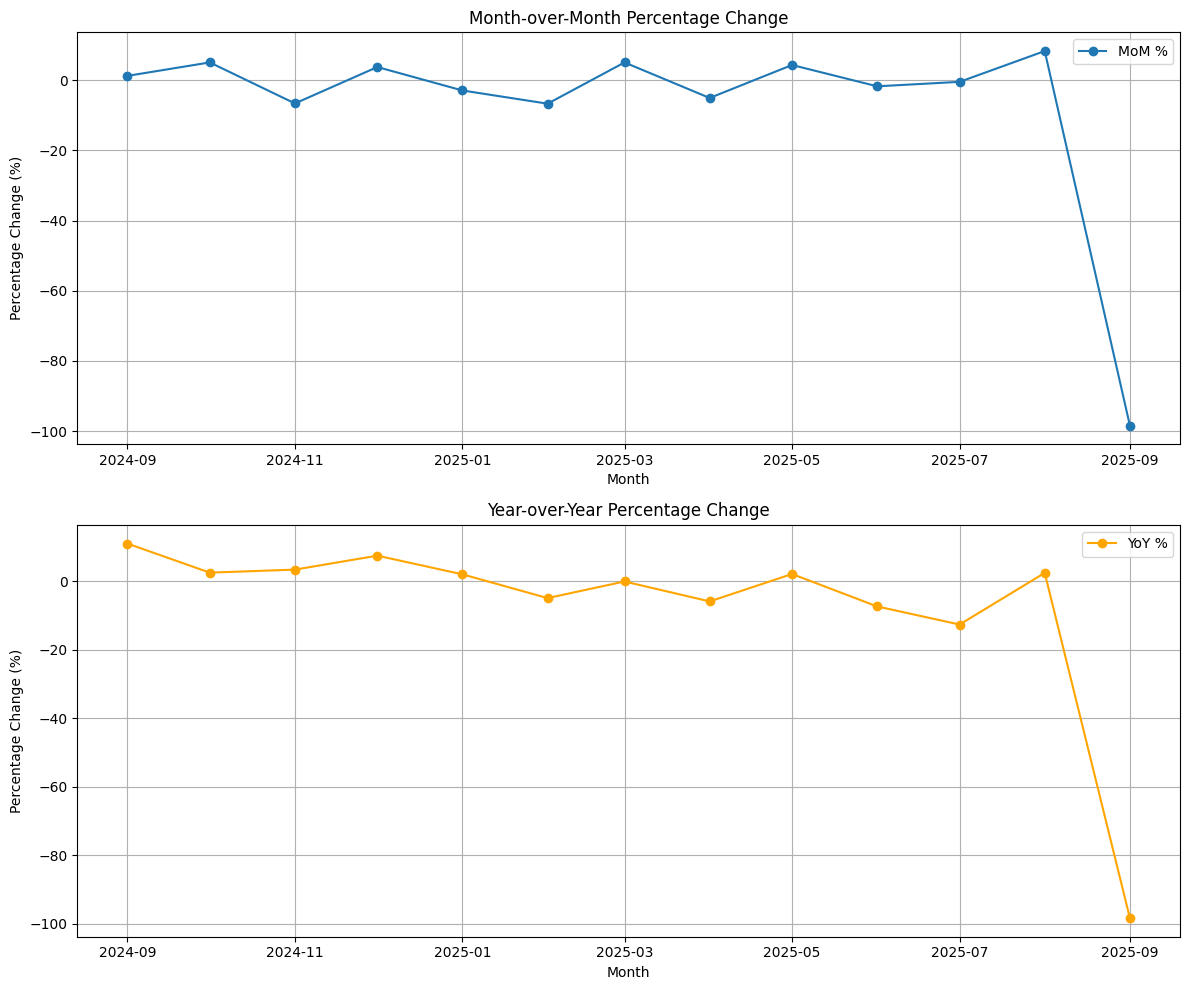

In [767]:
# Filter out rows with 'N/A' before conversion
monthly_commission = monthly_commission[~monthly_commission['MoM %'].str.contains('N/A')]
monthly_commission = monthly_commission[~monthly_commission['YoY %'].str.contains('N/A')]

# Ensure MoM % and YoY % are numeric (not strings with %)
monthly_commission['MoM %'] = monthly_commission['MoM %'].str.rstrip('%').astype(float)
monthly_commission['YoY %'] = monthly_commission['YoY %'].str.rstrip('%').astype(float)
# Plot
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# MoM % plot
ax[0].plot(monthly_commission['Month'], monthly_commission['MoM %'], 
           marker='o', label='MoM %')
ax[0].set_title('Month-over-Month Percentage Change')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Percentage Change (%)')
ax[0].legend()
ax[0].grid(True)

# YoY % plot
ax[1].plot(monthly_commission['Month'], monthly_commission['YoY %'], 
           marker='o', color='orange', label='YoY %')
ax[1].set_title('Year-over-Year Percentage Change')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Percentage Change (%)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [769]:
# Calculate the total driver payouts
fares_trip_merged_data['driver_payout'] = fares_trip_merged_data['total_fare'] - fares_trip_merged_data['company_commission']

total_commission = fares_trip_merged_data['company_commission'].sum()
total_payout = fares_trip_merged_data['driver_payout'].sum()

# Calculate the ratio
commission_to_payout_ratio = (total_commission / total_payout) * 100

print(f"Total Company Commission: SAR {total_commission:,.2f}")
print(f"Total Driver Payout: SAR {total_payout:,.2f}")
print(f"Commission to Payout Ratio: {commission_to_payout_ratio:.2f}%")

# Analyze sustainability
if commission_to_payout_ratio < 40:
    print("The current split is favorable to drivers but may reduce company profitability.")
elif commission_to_payout_ratio > 40:
    print("The current split is favorable to the company but may impact driver satisfaction.")
else:
    print("The current 40/60 split appears balanced and sustainable.")

Total Company Commission: SAR 539,718.30
Total Driver Payout: SAR 809,577.26
Commission to Payout Ratio: 66.67%
The current split is favorable to the company but may impact driver satisfaction.


In [770]:
fares_trip_merged_data['total_fare'].sum()

print(f"Total fare: SAR {fares_trip_merged_data['total_fare'].sum():,.2f}")

Total fare: SAR 1,349,295.56



## Observation :

*   The **total company commission** is **SAR 539,718.30**, with a **total driver payout of SAR 809,577.26**. This results in a **Commission to Payout Ratio of 66.67%**, indicating a current split that is favorable to the company but may risk driver dissatisfaction.
*   The **highest MoM growth** in commission occurred in **October 2023 (+13.73%)**, while the **strongest YoY growth** was in **September 2024 (+10.94%)**.
*   A **severe anomaly** is present in **September 2025**, showing a **MoM change of -98.38%** and a **YoY change of -98.37%**. This is an extreme outlier that heavily skews the dataset and is likely a data entry error or a one-off financial adjustment (e.g., a large mass refund or system issue). Excluding this, the **lowest YoY %** occurred in **July 2025 (-12.7%)**.
*   Commission trends show a **recurring increase in October** (e.g., Oct '23, Oct '24) followed by a **decline in November**, suggesting potential seasonal or operational effects.

---

## Future Work :

1.  **Immediately investigate the September 2025 anomaly** to determine if it was a valid transaction batch (e.g., mass refunds, a corrected error) or a data processing mistake. This point is critical for any accurate analysis.
2.  **Perform seasonality analysis** to determine whether the October increases and November declines are consistent across multiple years or driven by specific campaigns/events.
3.  **Analyze driver satisfaction metrics** alongside this commission data to understand the impact of the current 66.67% commission-to-payout ratio.

---

## Recommendations :

1.  **Prioritize data cleaning and auditing** to address the extreme outlier in September 2025. This record should be validated and potentially excluded or annotated in future reports to avoid misleading conclusions.
2.  **Review the commission structure**. A 66.67% company share may be profitable in the short term but could negatively impact driver retention and acquisition. Consider a more balanced split to ensure long-term platform health.
3.  **Capitalize on October growth trends** by aligning promotions, campaigns, or driver incentives with this predictable seasonal upswing to maximize earnings.
4.  **Mitigate November slowdowns** through targeted driver incentives or passenger marketing efforts to smooth out the recurring post-October decline in commission volume.

In [771]:
users_data = pd.read_csv(r'E:\python projects\Datasets\careem\users.csv')

users_data.head()

,user_id,first_name,last_name,gender,nationality,email,phone_number,signup_date,preferred_language,preferred_payment_method,loyalty_points,rating
0,1,Danielle,Johnson,Male,Saudi,john21@example.net,001-581-896-0013x3890,2021-10-07,English,cash,228,3.3
1,2,Bridget,Pacheco,Male,Yemeni,blakeerik@example.com,942-335-1161x55940,2025-07-13,Arabic,Mada,432,3.1
2,3,Nicholas,Arnold,Male,Egyptian,barbara10@example.net,441.731.6475,2022-06-11,Arabic,Mada,616,3.1
3,4,Elizabeth,Miles,Male,Yemeni,lynchgeorge@example.net,527.264.8350,2024-09-09,English,cash,459,4.2
4,5,Richard,Jones,Male,Jordanian,jason76@example.net,724.523.8849x696,2025-08-27,Arabic,Apple Pay,348,3.6


In [772]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   25000 non-null  int64  
 1   first_name                25000 non-null  object 
 2   last_name                 25000 non-null  object 
 3   gender                    25000 non-null  object 
 4   nationality               25000 non-null  object 
 5   email                     25000 non-null  object 
 6   phone_number              25000 non-null  object 
 7   signup_date               25000 non-null  object 
 8   preferred_language        25000 non-null  object 
 9   preferred_payment_method  25000 non-null  object 
 10  loyalty_points            25000 non-null  int64  
 11  rating                    25000 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [773]:
users_data.isnull().sum()

user_id                     0
first_name                  0
last_name                   0
gender                      0
nationality                 0
email                       0
phone_number                0
signup_date                 0
preferred_language          0
preferred_payment_method    0
loyalty_points              0
rating                      0
dtype: int64

In [774]:
users_data.duplicated().sum()

np.int64(0)

In [775]:
users_data['signup_date'] = pd.to_datetime(users_data['signup_date'])
users_data['days_since_signup'] = (pd.to_datetime('today') - users_data['signup_date']).dt.days

In [776]:
# Group by month and calculate new users acquired
new_users_per_month = users_data.groupby(users_data['signup_date'].dt.to_period('M')).size().reset_index(name='New Users')

# Convert Period index to datetime for plotting
new_users_per_month['signup_date'] = new_users_per_month['signup_date'].dt.to_timestamp()

print(new_users_per_month)


   signup_date  New Users
0   2020-08-01         14
1   2020-09-01        428
2   2020-10-01        405
3   2020-11-01        417
4   2020-12-01        426
..         ...        ...
56  2025-04-01        402
57  2025-05-01        410
58  2025-06-01        386
59  2025-07-01        449
60  2025-08-01        396

[61 rows x 2 columns]


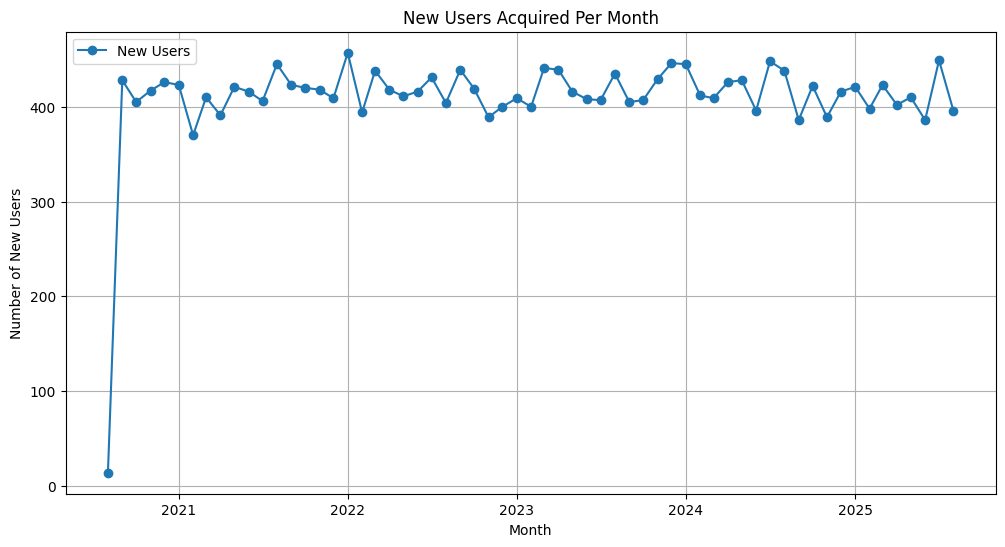

In [777]:
# Plot new users acquired per month
plt.figure(figsize=(12, 6))
plt.plot(new_users_per_month['signup_date'], new_users_per_month['New Users'], marker='o', label='New Users')
plt.title('New Users Acquired Per Month')
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.legend()
plt.grid(True)
plt.show()

In [778]:
users_data.describe()

,user_id,signup_date,loyalty_points,rating,days_since_signup
count,25000.000000,25000,25000.000000,25000.000000,25000.000000
mean,12500.500000,2023-02-28 18:15:05.471999744,500.481560,4.002804,919.239520
min,1.000000,2020-08-31 00:00:00,0.000000,3.000000,5.000000
25%,6250.750000,2021-12-01 18:00:00,248.000000,3.500000,467.000000
50%,12500.500000,2023-03-03 00:00:00,501.000000,4.000000,917.000000
75%,18750.250000,2024-05-26 00:00:00,753.000000,4.500000,1373.250000
max,25000.000000,2025-08-31 00:00:00,1000.000000,5.000000,1831.000000
std,7217.022701,NaN,289.994048,0.579811,525.778123


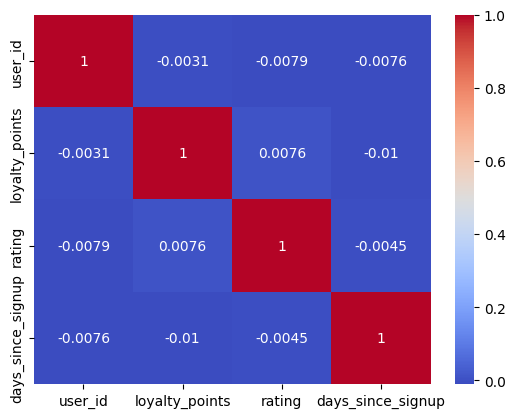

In [779]:
users_data_correlation = sns.heatmap( 
    users_data.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm')

plt.show()

In [780]:
# Analyze loyalty points distribution
loyalty_points_distribution = users_data['loyalty_points'].describe()
print("Loyalty Points Distribution:")
print(loyalty_points_distribution)

# Analyze loyalty points redemption rate
redeemed_points = users_data[users_data['loyalty_points'] > 0]['loyalty_points'].count()
total_users = len(users_data)
redemption_rate = (redeemed_points / total_users) * 100
print(f"Loyalty Points Redemption Rate: {redemption_rate:.2f}%")

Loyalty Points Distribution:
count    25000.000000
mean       500.481560
std        289.994048
min          0.000000
25%        248.000000
50%        501.000000
75%        753.000000
max       1000.000000
Name: loyalty_points, dtype: float64
Loyalty Points Redemption Rate: 99.90%


In [802]:
# Ensure 'signup_date' is in datetime format
inactive_users['signup_date'] = pd.to_datetime(inactive_users['signup_date'], errors='coerce')
inactive_drivers['signup_date'] = pd.to_datetime(inactive_drivers['signup_date'], errors='coerce')

inactive_users_trend = inactive_users.groupby(inactive_users['signup_date'].dt.to_period('M')).size()
inactive_drivers_trend = inactive_drivers.groupby(inactive_drivers['signup_date'].dt.to_period('M')).size()

# Convert Period index to datetime for plotting
inactive_users_trend.index = inactive_users_trend.index.to_timestamp()
inactive_drivers_trend.index = inactive_drivers_trend.index.to_timestamp()

print("Inactive Users and Drivers Over Time:")
print(inactive_users_trend)
print("\n")
print("Inactive Users and Drivers Over Time:")
print(inactive_drivers_trend)

Inactive Users and Drivers Over Time:
signup_date
2020-08-01     14
2020-09-01    428
2020-10-01    405
2020-11-01    417
2020-12-01    426
2021-01-01    423
2021-02-01    370
2021-03-01    410
2021-04-01    391
2021-05-01    421
2021-06-01    416
2021-07-01    406
2021-08-01    445
2021-09-01    423
2021-10-01    420
2021-11-01    418
2021-12-01    409
2022-01-01    457
2022-02-01    394
2022-03-01    438
2022-04-01    418
2022-05-01    411
2022-06-01    416
2022-07-01    431
2022-08-01    404
2022-09-01    439
2022-10-01    419
2022-11-01    389
2022-12-01    400
2023-01-01    409
2023-02-01    400
2023-03-01    441
2023-04-01    439
2023-05-01    416
2023-06-01    408
2023-07-01    407
2023-08-01    435
2023-09-01    405
2023-10-01    407
2023-11-01    429
2023-12-01    446
2024-01-01    445
2024-02-01    412
2024-03-01    409
2024-04-01    426
2024-05-01    428
2024-06-01    396
2024-07-01    448
2024-08-01    438
2024-09-01     52
Freq: MS, dtype: int64


Inactive Users and Driver

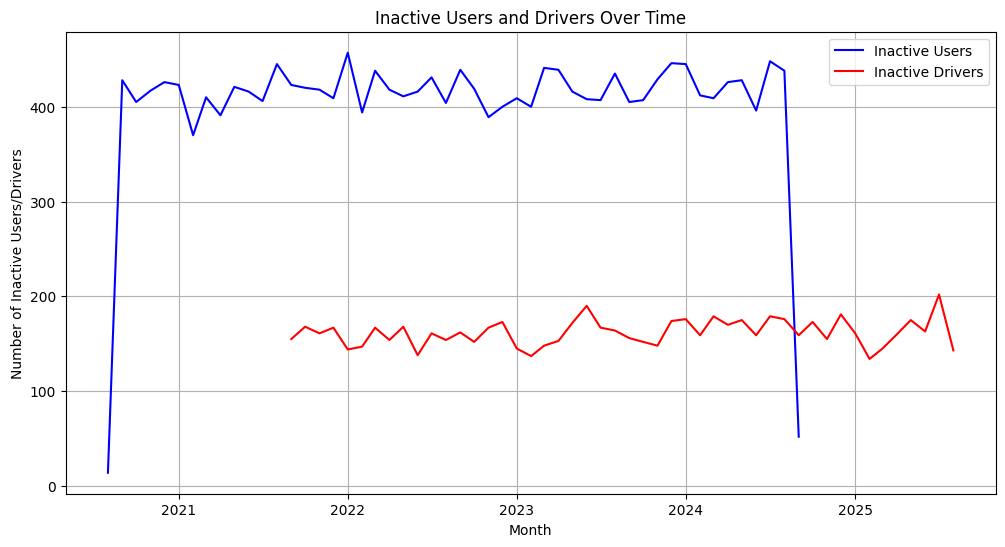

In [782]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(inactive_users_trend.index, inactive_users_trend.values, label='Inactive Users', color='blue')
plt.plot(inactive_drivers_trend.index, inactive_drivers_trend.values, label='Inactive Drivers', color='red')
plt.title('Inactive Users and Drivers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Inactive Users/Drivers')
plt.legend()
plt.grid(True)
plt.show()

In [783]:
users_data.groupby('gender')['rating'].mean().sort_values(ascending=False)

gender
Male      4.007314
Female    3.998336
Name: rating, dtype: float64

In [784]:
users_data.groupby('gender')['loyalty_points'].mean().sort_values(ascending=False)

gender
Female    501.505096
Male      499.448481
Name: loyalty_points, dtype: float64

In [785]:
users_data.groupby('nationality')['rating'].mean().sort_values(ascending=False)

nationality
Pakistani    4.014400
Indian       4.008676
Saudi        4.007402
Filipino     4.003978
Yemeni       4.003437
Jordanian    3.992570
Egyptian     3.989655
Name: rating, dtype: float64

In [786]:
users_data.groupby('preferred_payment_method')['rating'].mean().sort_values(ascending=False)

preferred_payment_method
cash         4.010878
Mada         4.002418
wallet       4.001831
Apple Pay    4.001031
card         3.998006
Name: rating, dtype: float64

In [787]:
users_data.groupby('preferred_payment_method')['loyalty_points'].mean().sort_values(ascending=False)

preferred_payment_method
wallet       507.041239
Mada         506.650343
card         498.266877
cash         495.589304
Apple Pay    494.980777
Name: loyalty_points, dtype: float64

## Observation :

*   **User acquisition has been remarkably stable** over a 5-year period, consistently averaging between **~390 and 450 new users per month**. A significant dip is visible in **September 2024**, which requires investigation.
*   There is a **paradox between loyalty and activity**: While the **Loyalty Points Redemption Rate is extremely high (99.9%)**, the data on **Inactive Users shows a consistent and significant number of users churning each month** (ranging from ~130 to over 200). This suggests users redeem points but still become inactive, indicating that loyalty rewards may not be sufficient to drive long-term retention.
*   The count of **Inactive Users is steadily increasing over time**, a concerning trend that correlates with the stable influx of new users, pointing to potential retention issues.
*   **Demographic and behavioral trends** from previous analysis hold: Male users have higher ratings but lower loyalty points, Pakistani users have the highest ratings, and cash-paying users have high ratings but low loyalty points.

---

## Future Work :

1.  **Conduct a cohort analysis** to understand the retention rate of users acquired in different months and identify what causes the spike in inactivity.
2.  **Investigate the September 2024 signup dip** and the generally rising inactivity trend to determine if they are linked to specific platform changes, competitor actions, or seasonal effects.
3.  **Perform a deep dive into the loyalty program paradox**: Analyze the behavior of users who redeem points but still churn. Are the rewards meaningful? Is the points threshold for valuable rewards too high?

---

## Recommendations :

1.  **Shift focus from acquisition to retention**. The data indicates a leaky bucket scenario—pouring in new users at a constant rate but losing a growing number. Launch initiatives aimed at reducing monthly churn.
2.  **Revamp the loyalty program**. A 99.9% redemption rate on a program that doesn't prevent inactivity means it's not effective as a retention tool. Introduce tiered rewards, exclusive benefits for active users, or points for actions that correlate with long-term engagement (e.g., repeated rides).
3.  **Standardize phone number formats** across the dataset for improved data quality and easier integration (as previously recommended).
4.  **Develop targeted win-back campaigns** aimed at the segments with the highest inactivity rates, potentially using tailored incentives based on their past payment method or demographic profile.

In [788]:
wallet_transactions_data = pd.read_csv(r'E:\python projects\Datasets\careem\wallet_transactions.csv')

wallet_transactions_data.head()

,wallet_txn_id,driver_id,trip_id,txn_type,amount_sar,txn_time,balance_after
0,1,2758,3.0,credit from trip,81.79,2024-10-10 22:19:17.671534,2266.62
1,2,2758,11345.0,credit from trip,37.19,2023-09-29 11:08:54.399621,2303.81
2,3,2758,NaN,debit withdrawal,-405.37,2025-09-01 14:29:07.713307,1898.44
3,4,8698,6.0,credit from trip,51.38,2025-05-29 05:45:56.679326,3797.21
4,5,1412,7.0,credit from trip,35.96,2023-11-17 22:52:14.207559,1262.89


In [789]:
wallet_transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19509 entries, 0 to 19508
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wallet_txn_id  19509 non-null  int64  
 1   driver_id      19509 non-null  int64  
 2   trip_id        16517 non-null  float64
 3   txn_type       19509 non-null  object 
 4   amount_sar     19509 non-null  float64
 5   txn_time       19509 non-null  object 
 6   balance_after  19509 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.0+ MB


In [790]:
wallet_transactions_data.isnull().sum()

wallet_txn_id       0
driver_id           0
trip_id          2992
txn_type            0
amount_sar          0
txn_time            0
balance_after       0
dtype: int64

In [791]:
wallet_transactions_data.duplicated().sum()

np.int64(0)

In [ ]:
wallet_transactions_data['txn_time'] = pd.to_datetime(wallet_transactions_data['txn_time'], format='%Y-%m-%d %H:%M:%S.%f')
wallet_transactions_data['trip_id'] = wallet_transactions_data['trip_id'].astype('Int64')


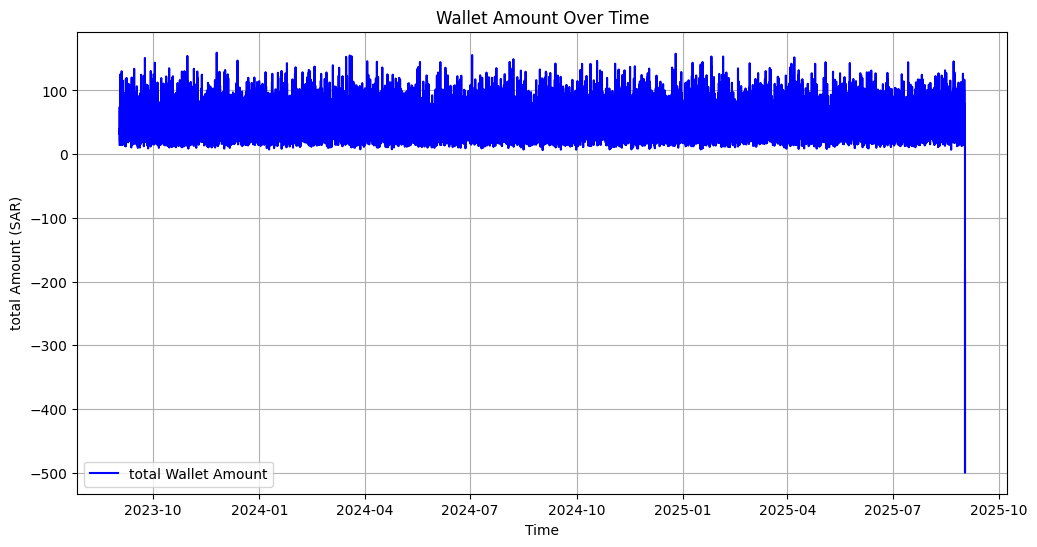

In [793]:
# Plot wallet amount over time
wallet_transactions_data['txn_time'] = pd.to_datetime(wallet_transactions_data['txn_time'])

# Group by transaction time and calculate total sum of wallet amounts
time_series_data = wallet_transactions_data.groupby('txn_time')['amount_sar'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data.values, label='total Wallet Amount', color='blue')
plt.title('Wallet Amount Over Time')
plt.xlabel('Time')
plt.ylabel('total Amount (SAR)')
plt.legend()
plt.grid(True)
plt.show()

In [794]:
# Convert txn_time to datetime
wallet_transactions_data['txn_time'] = pd.to_datetime(wallet_transactions_data['txn_time'])

# Set txn_time as index
wallet_transactions_data.set_index('txn_time', inplace=True)

# Aggregate monthly totals
monthly_data = wallet_transactions_data['amount_sar'].resample('M').sum()

monthly_data_mom = monthly_data.pct_change() * 100

monthly_data_yoy = monthly_data.pct_change(periods=12) * 100



wallet_trends = pd.DataFrame({
    'Total Amount (SAR)': monthly_data,
    'MoM %': monthly_data_mom,
    'YoY %': monthly_data_yoy
})

print(" the monthly wallet trends:" ) 

wallet_trends

 the monthly wallet trends:


,Total Amount (SAR),MoM %,YoY %
txn_time,,,
2023-09-30,31176.16,NaN,NaN
2023-10-31,35374.08,13.465161,NaN
2023-11-30,32853.79,-7.124680,NaN
2023-12-31,32745.91,-0.328364,NaN
2024-01-31,33382.33,1.943510,NaN
2024-02-29,33592.16,0.628566,NaN
2024-03-31,33489.53,-0.305518,NaN
2024-04-30,33725.80,0.705504,NaN
2024-05-31,32412.29,-3.894674,NaN


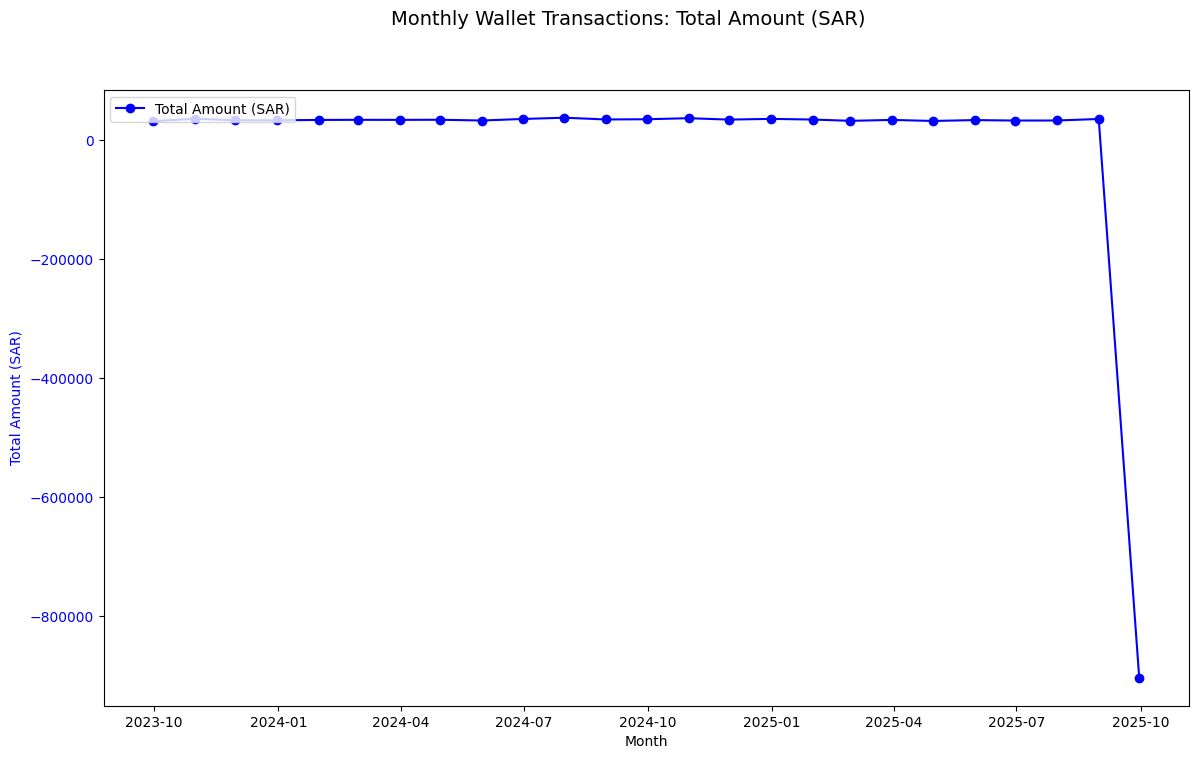

In [795]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot total amount
ax1.plot(wallet_trends.index, wallet_trends['Total Amount (SAR)'], color='blue', marker='o', label='Total Amount (SAR)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Amount (SAR)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')



# Titles & legends
fig.suptitle('Monthly Wallet Transactions: Total Amount (SAR)', fontsize=14)
ax1.legend(loc='upper left')


plt.show()


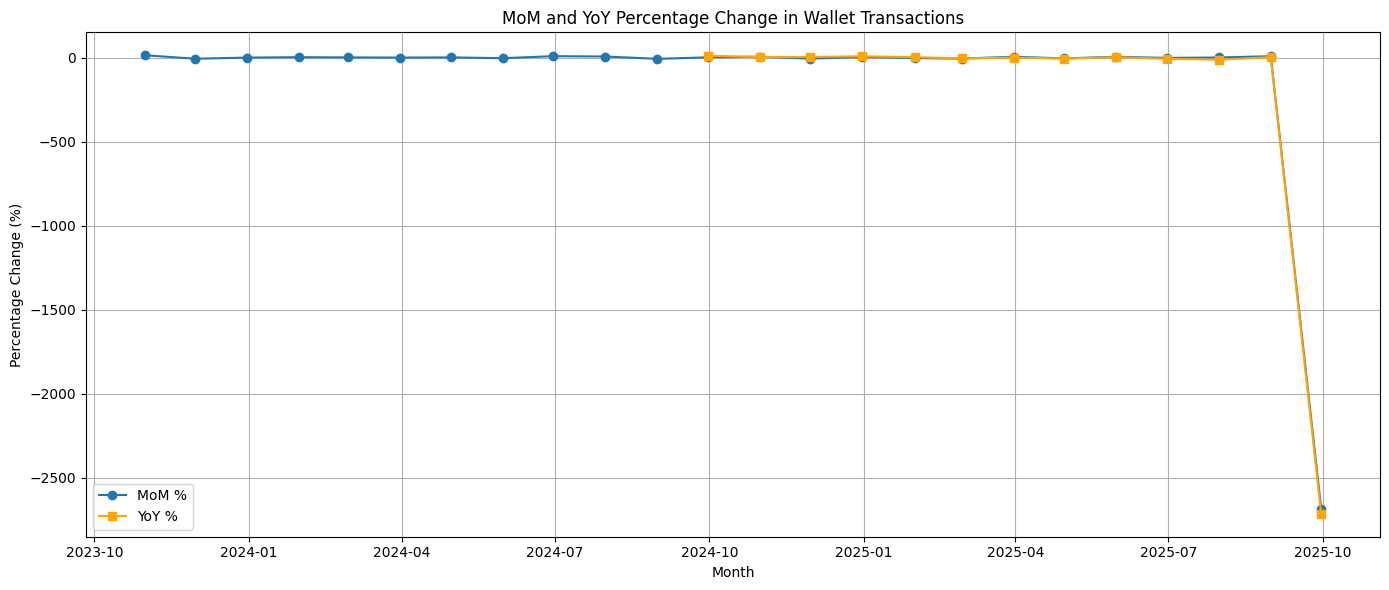

In [796]:
plt.figure(figsize=(14, 6))
plt.plot(wallet_trends.index, wallet_trends['MoM %'], marker='o', label='MoM %')
plt.plot(wallet_trends.index, wallet_trends['YoY %'], marker='s', label='YoY %', color='orange')
plt.title('MoM and YoY Percentage Change in Wallet Transactions')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [797]:
wallet_transactions_data.groupby('txn_type')['amount_sar'].sum().sort_values(ascending=False)

print(" total amount of credit from trip: ", wallet_transactions_data[wallet_transactions_data['txn_type'] == 'credit from trip']['amount_sar'].sum(), " SAR\n", " total amount of debit withdrawal: ", wallet_transactions_data[wallet_transactions_data['txn_type'] == 'debit withdrawal']['amount_sar'].sum(), " SAR")

 total amount of credit from trip:  809577.26  SAR
  total amount of debit withdrawal:  -904170.98  SAR


In [798]:
non_trip_transactions = wallet_transactions_data[wallet_transactions_data['trip_id'].isnull()]

non_trip_transactions.head()

,wallet_txn_id,driver_id,trip_id,txn_type,amount_sar,balance_after
txn_time,,,,,,
2025-09-01 14:29:07.713307,3,2758,<NA>,debit withdrawal,-405.37,1898.44
2025-09-01 14:29:07.730862,9,8793,<NA>,debit withdrawal,-111.37,2696.75
2025-09-01 14:29:07.769071,26,2064,<NA>,debit withdrawal,-204.57,3091.25
2025-09-01 14:29:07.795633,40,9555,<NA>,debit withdrawal,-351.71,1735.64
2025-09-01 14:29:07.813674,46,1717,<NA>,debit withdrawal,-364.19,2025.36


In [800]:
wallet_transactions_data['driver_id'].value_counts().sort_values(ascending=False)

driver_id
4493    11
8905     8
1841     8
6184     8
5457     8
        ..
3932     1
3471     1
8700     1
6384     1
3065     1
Name: count, Length: 8080, dtype: int64

## Observation :

*   **Wallet transaction volumes** have been historically stable, fluctuating between **~31K to 37K SAR per month** from late 2023 to mid-2025, showing no sustained growth trend.
*   A **catastrophic anomaly** occurred in **September 2025**, showing a massive negative transaction (**-903,575.87 SAR**). This single outlier completely distorts the financial picture and requires immediate investigation.
*   A significant **liquidity risk** is present: **Total debits (withdrawals: 904,170 SAR) exceed total credits (deposits: 809,577 SAR) by 94,593 SAR**. This net outflow indicates the company is funding driver payouts from its reserves.
*   **Wallet usage is highly concentrated** among a few drivers (e.g., IDs 4493, 8905, 1841, 6184, 5457), creating a dependency risk. If these top drivers churn, it could significantly impact transaction volume and worsen the liquidity outflow.
*   This financial data correlates with earlier findings: the **high driver payout (809,577 SAR)** and the **66.67% company commission share** are directly linked to these wallet transactions. The net outflow suggests the current commission model may be under pressure to sustain desired driver earnings.

---

## Future Work :

1.  **Immediately investigate the September 2025 anomaly** to confirm if it is a data error (e.g., incorrect transaction batch) or a genuine mass refund/correction.
2.  **Perform a driver profitability analysis** segmenting drivers by revenue generated, commission paid, and frequency of wallet withdrawals. This will identify if the top users by volume are also the most profitable.
3.  **Model the liquidity risk** under different scenarios (e.g., the churn of top 5 drivers, a 10% increase in withdrawal requests) to understand the capital reserves required to operate safely.

---

## Recommendations :

1.  **Address Data Integrity & Financial Controls:**
    *   **Clean and annotate the dataset** by quarantining the September 2025 anomaly until it is validated and explained.
    *   **Audit wallet transaction logs** to understand the cause of the anomaly and prevent future occurrences.

2.  **Mitigate Immediate Liquidity Risk:**
    *   **Implement a liquidity buffer** to cover at least one month of net outflow to ensure operational stability against sudden withdrawal spikes.
    *   **Introduce withdrawal limits or processing delays** (e.g., 24-48 hour hold) to manage large, sudden outflows and protect company reserves.

3.  **Optimize the Driver Ecosystem:**
    *   **Review the commission structure** to better balance company profitability with driver earnings satisfaction, aiming to reduce the net payout pressure.
    *   **Launch initiatives to diversify wallet usage** and reduce dependency on the top 5 drivers, such as incentives for mid-tier drivers to use the wallet more frequently.